In [239]:
#Import Statements
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

#functions
def gaborFilter(v, Fs, tres, plot_count, ftype='gaussian'):
    '''The Gabor method, or short-time Fourier transform, trades away some measure of 
    accuracy in both the time and frequency domains in order to give both time and frequency 
    resolution simultaneously.

    This function takes in a two dimensional signal, performs multi-resolution analysis of 
    the signal with Gabor filtering for showing signal frequency content over time.
    
    INPUTS:
    v: numpy.ndarray of signal to analyze.
    Fs: scalar value indicating signal sampling rate. Used to determine time scale for analysis
    ftype: string indicating type of filter to use for the Gabor method
    tres: scalar value indicating the time resolution to use for filtering.
    plot_count: scalar value indicating number of filtered signal plots to output
    
    OUTPUTS:
    Sgt_spec: numpy.ndarray of fourier transformed and shifted data in each time bin
    
    Plots:
    Plots showing the Gabor filtered signal at time points across the range of time bins
    '''

    t2 = (np.arange(0,len(v) + 1)) / Fs
    t = t2[0:len(v)]

    L = (len(v) - 1) / Fs[0] # frequency domain
    n = len(v); # Fourier modes

    tslide = np.arange(0, L, tres)

    Sgt_spec = np.zeros((len(tslide), len(v) - 1))#creates empty matrix to store fft for each window of time

    vt = np.transpose(v)
    
    plot_num = len(tslide) / plot_count #number of plots to generate across the range of time bins
    

    for j in range(0, len(tslide)):
        if ftype == 'gaussian':
            g = np.exp(-(t - tslide[j])**2) #Gaussian Wavelet
        elif ftype == 'gaussianB':
            g = np.exp(-0.1*(t - tslide[j])**2) #Gaussian Big
        elif ftype == 'gaussianS':
            g = np.exp(-10*(t - tslide[j])**2) #Gaussian Small
        elif ftype == 'mexicanHat':
            g = (1 - (t - tslide[j])**2)*np.exp(-(t - tslide[j])**2) #Mexican hat
        elif ftype == 'mexicanHatB':
            g = (1-0.1*(t - tslide[j])**2)*np.exp(-0.1*(t-tslide[j])**2) #Mexican hat big
        elif ftype == 'mexicanHatS':
            g = (1 - 10*(t - tslide[j])**2)*np.exp(-10*(t-tslide[j])**2) #Mexican hat small
        elif ftype == 'shannon':
            g = abs(t - tslide[j]) <= 0.5 #Shannon function
        elif ftype == 'shannonB':
            g = 0.1*abs(t - tslide[j]) <= 0.5 #Shannon function big
        elif ftype == 'shannonS':
            g = 10*abs(t-tslide[j]) <= 0.5 #Shannon function small
        else:
            g = np.exp(-2 * (t - tslide[j])**2); #Gabor filter shifted to center at tslide[j]
            
        Sg = np.transpose(g * vt) #apply filter to signal
        Sgt = np.fft.fft2(Sg[0:len(v) - 1]) #calculate fourier transform of filtered signal
        Sgt_spec[j, :] = np.transpose(abs(np.fft.fftshift(Sgt))) #save shifted fourier transform for spectrogram plotting
        if (j % plot_num == 0):
            f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))
            ax1.plot(t, v, color='black')
            ax1.plot(t, np.transpose(g), color='red')
            ax2.plot(t, Sg, color='black')
            ax3.plot(ks, abs(np.fft.fftshift(Sgt))/max(abs(np.fft.fftshift(Sgt))))
            
    return Sgt_spec, tslide
            
def spectroPlot(Sgt_spec, tslide, xlim, ylim, title):
    '''spectroPlot generates a spectrogram plot of Gabor filtered two dimensional signal data
    
    INPUT:
    Sgt_spec: Sgt_spec: numpy.ndarray of fourier transformed and shifted data in each time bin'''
    f, ax = plt.subplots()
    ax.pcolormesh(tslide, ks, np.transpose(Sgt_spec), cmap = 'hot')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    ax.set_title(title)
    ax.set(xlim = xlim, ylim = ylim)


In [240]:
#Data matrix contains 2 dimensional handel music sample
y_ = loadmat('y.mat')#load MATLAB .mat file into python as a dictionary
y = y_['y']#raw 'handel' music data matrix

Fs_ = loadmat('Fs.mat')#load MATLAB .mat file into python as a dictionary
Fs = Fs_['Fs']#raw data

r, c = y.shape

Text(0.5, 1.0, 'Signal of Interest, v(n)')

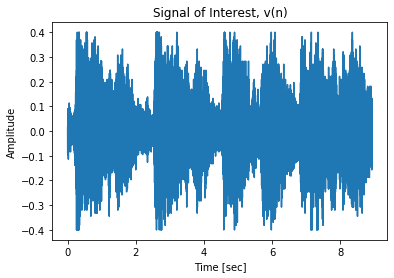

In [241]:
v = y / 2
t = (np.arange(0,len(v))) / Fs[0]

#plot of 'handel' music file from MATLAB
fig, ax = plt.subplots()
ax.plot(t, v)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Amplitude')
ax.set_title('Signal of Interest, v(n)')

In [242]:
#prepare time and frequency axes for filtering and subsequent plotting
t2 = (np.arange(0,len(v) + 1)) / Fs[0]
t = t2[0:len(v)]

L = (len(v) - 1) / Fs[0] # frequency domain
n = len(v); # Fourier modes

#construct wave numbers
k = np.concatenate([np.arange(0, (n / 2) - 1), np.arange(-n / 2, -1)])#fourier coeffs list accounting for the fft shift
k = k * (2 * np.pi / L)#convert to a 2 pi periodic domain by rescaling
ks = np.fft.fftshift(k)#k shifted to plot frequency domain as a funciton of wave number

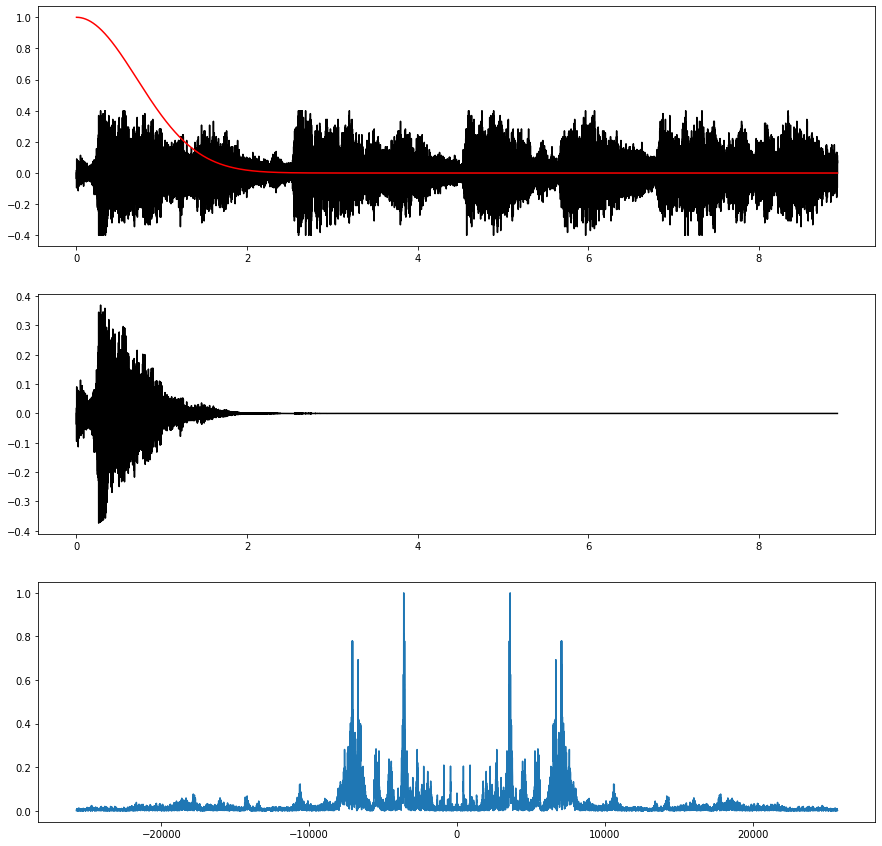

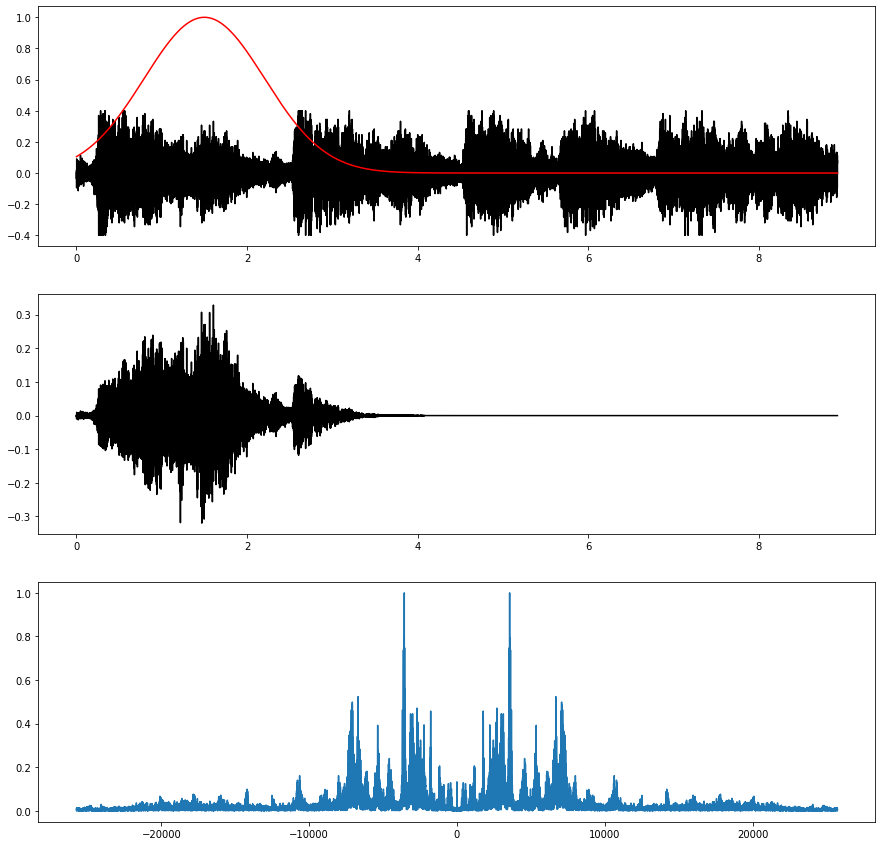

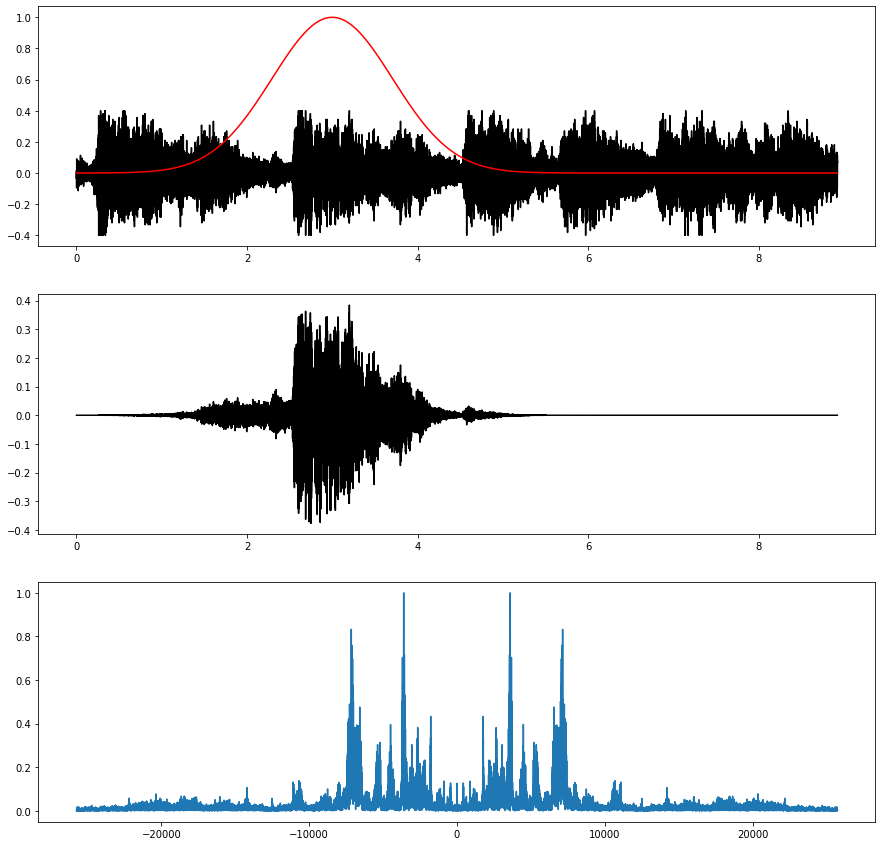

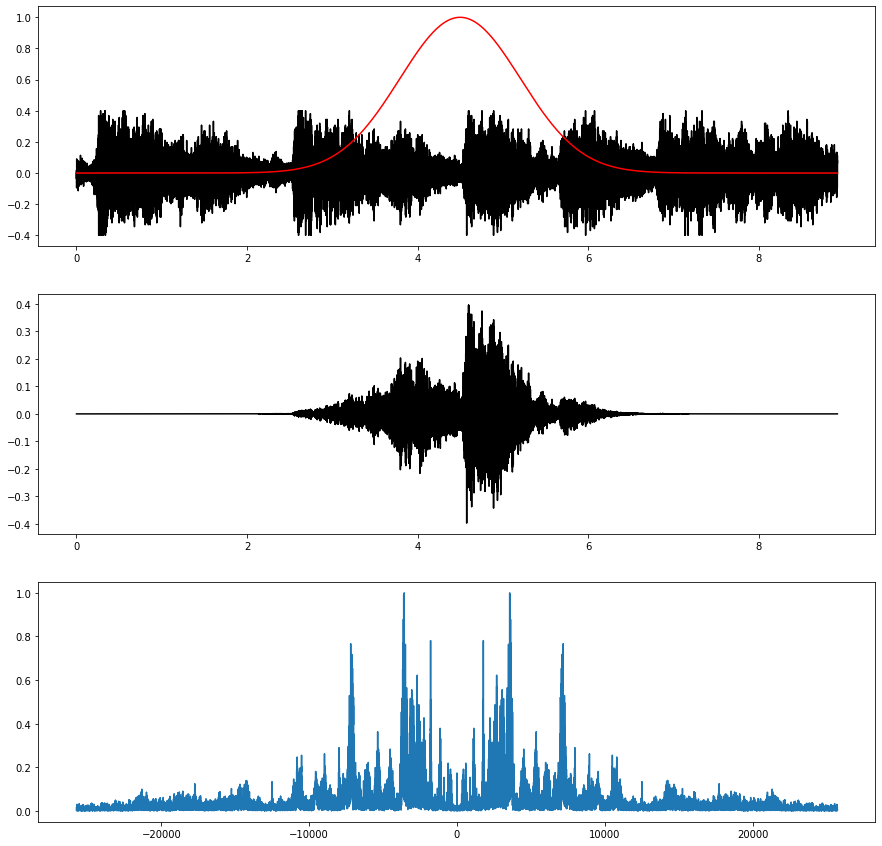

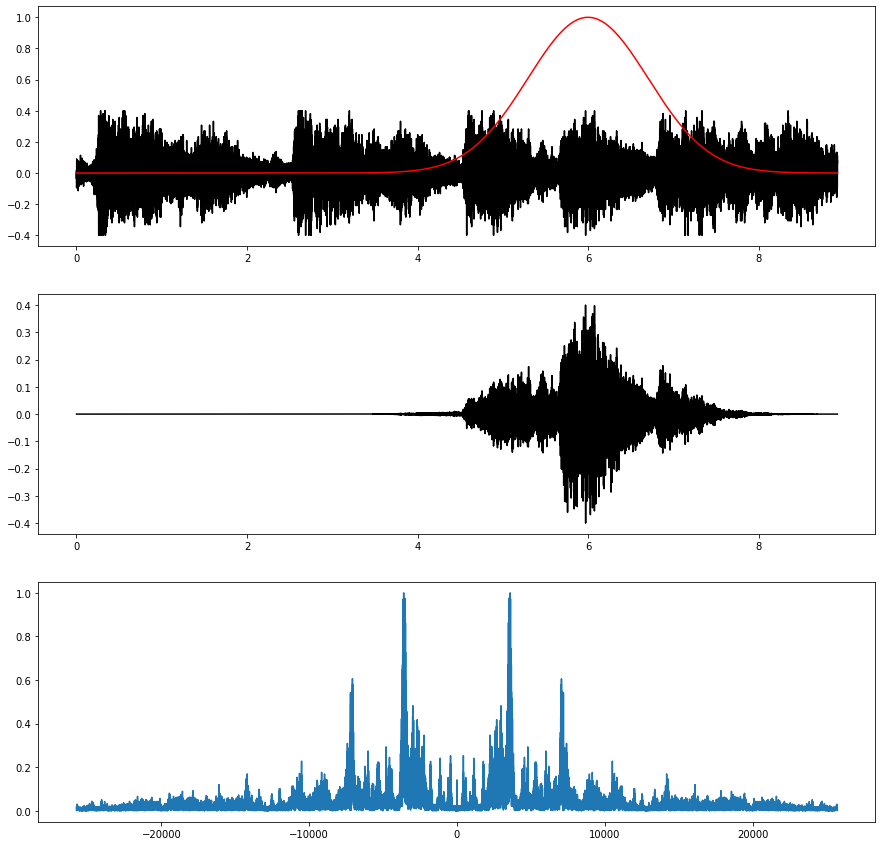

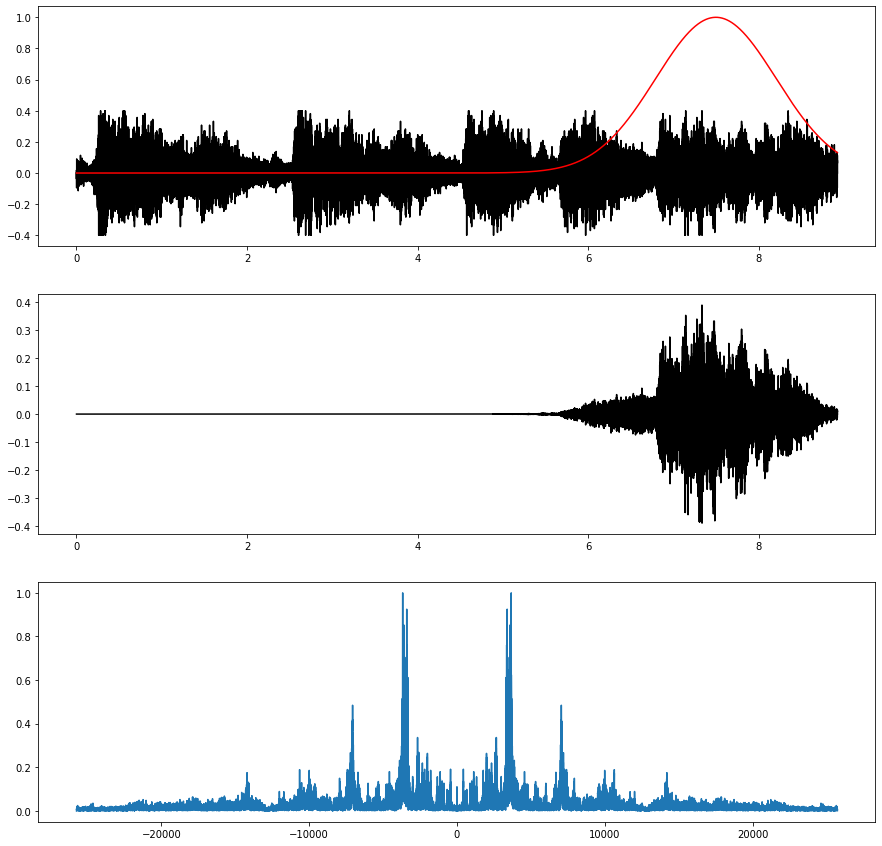

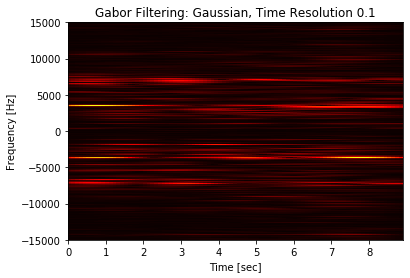

In [243]:
'''The Gabor method, or short-time Fourier transform, trades away some measure of 
accuracy in both the time and frequency domains in order to give both time and frequency 
resolution simultaneously.

In practice, the G´abor transform is computed by discretizing the time and
frequency domain. Thus a discrete version of the transform needs to
be considered.

Kutz, J. (2013). Data-Driven Modeling & Scientific Computation: Methods for Complex Systems & Big Data (First ed.). 
Oxford: Oxford University Press.'''

#Try Gaussian filter, time sampling 0.1
tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='gaussian')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: Gaussian, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

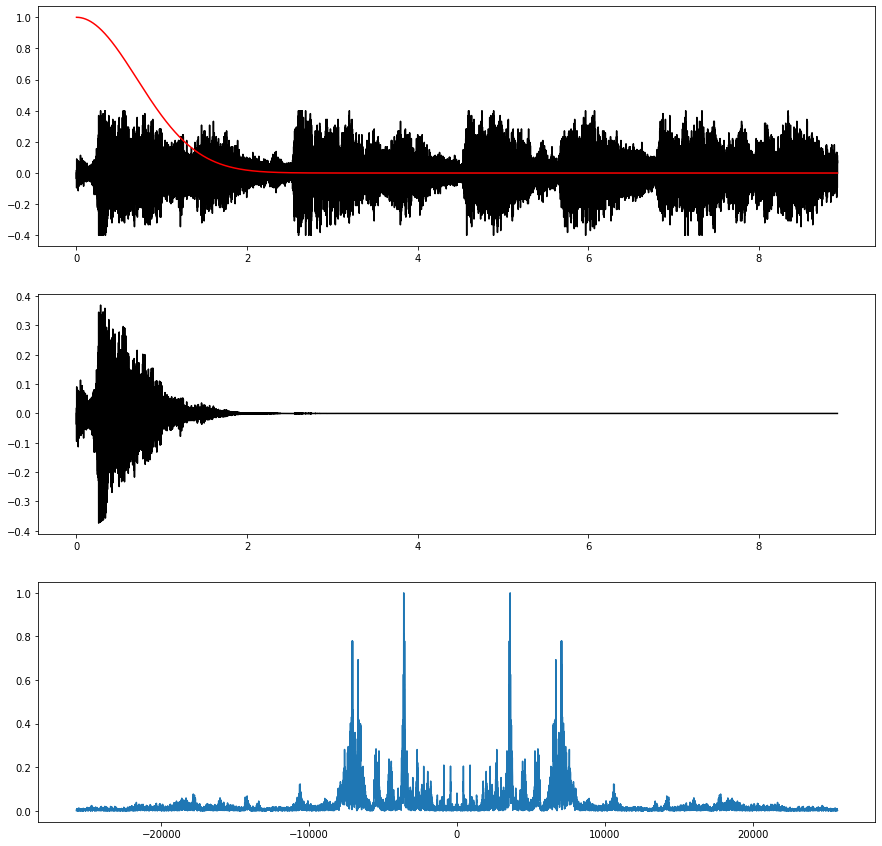

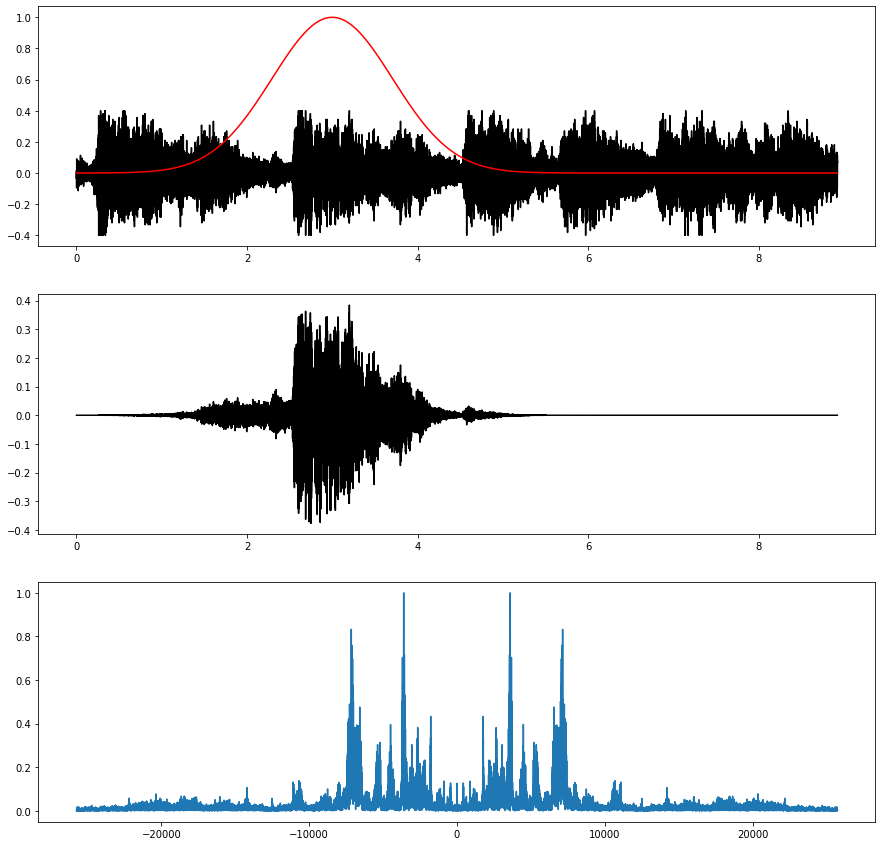

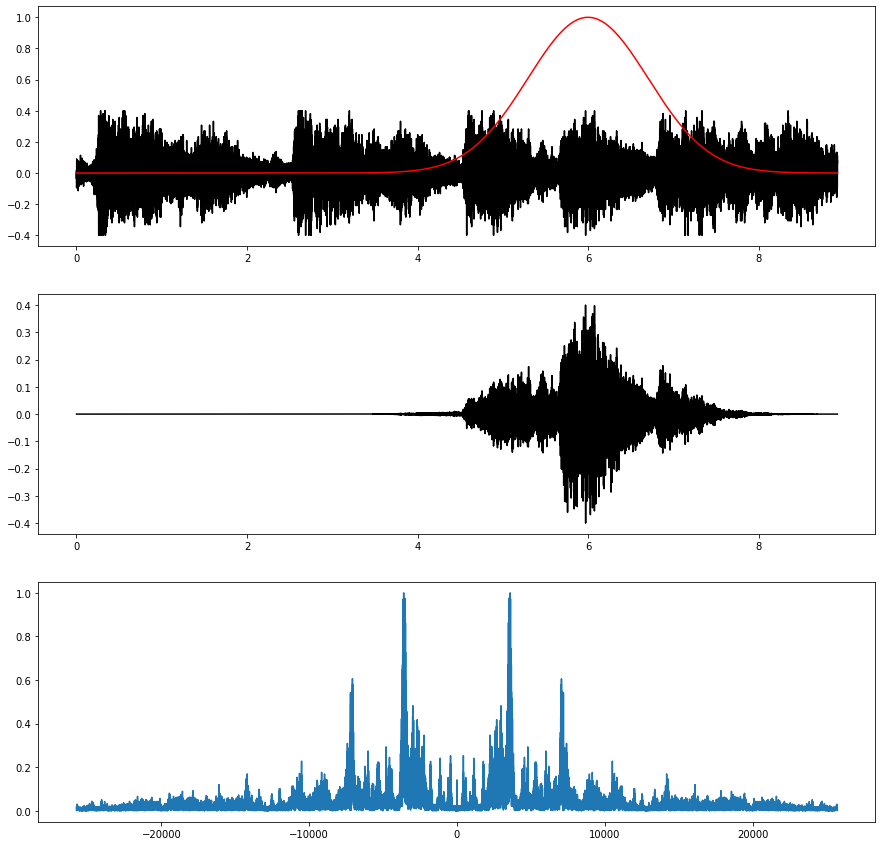

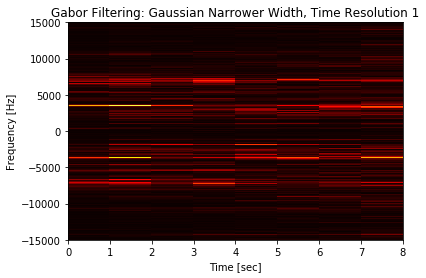

In [236]:
#Try Gaussian filter, with coarser time sampling 1
tres = 1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='gaussian')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: Gaussian Narrower Width, Time Resolution 1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

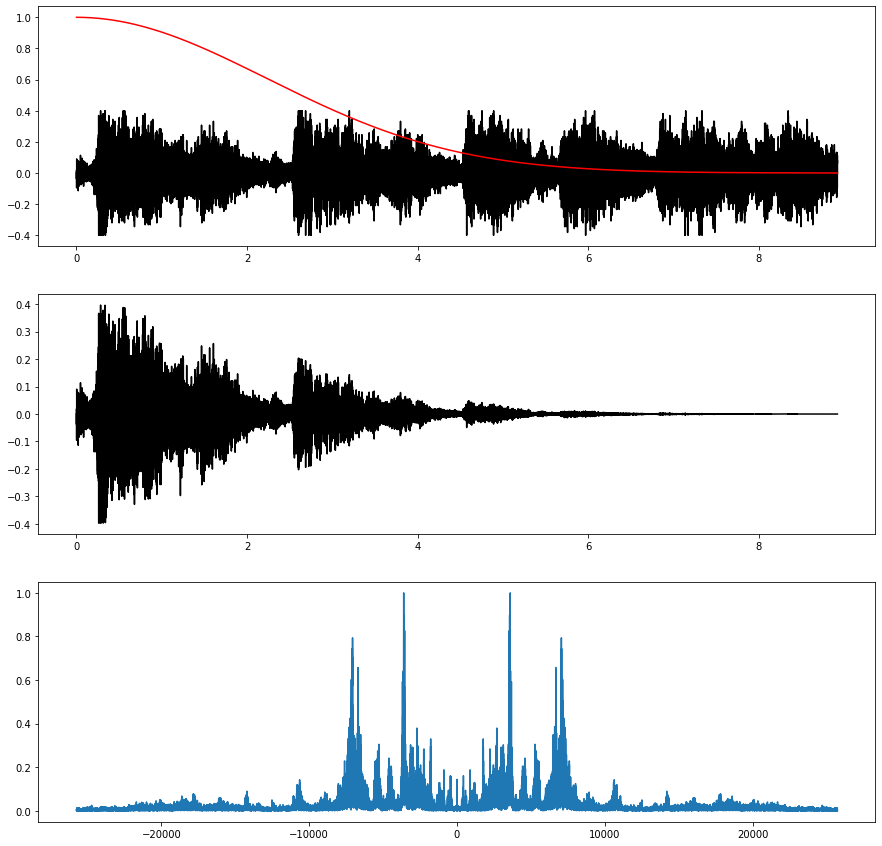

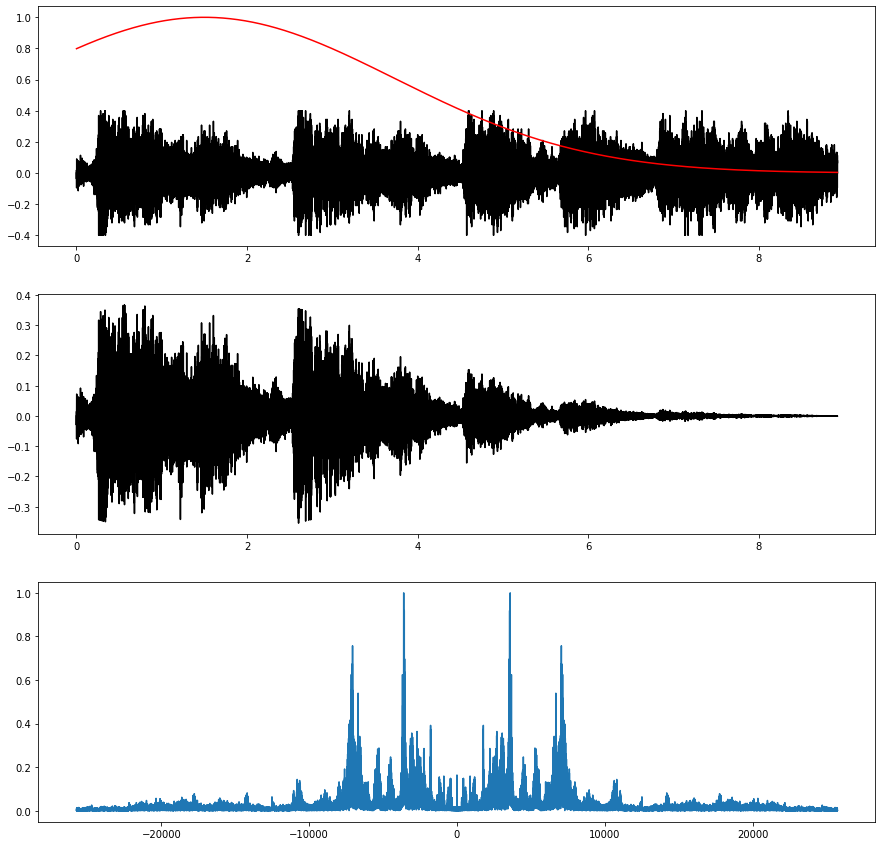

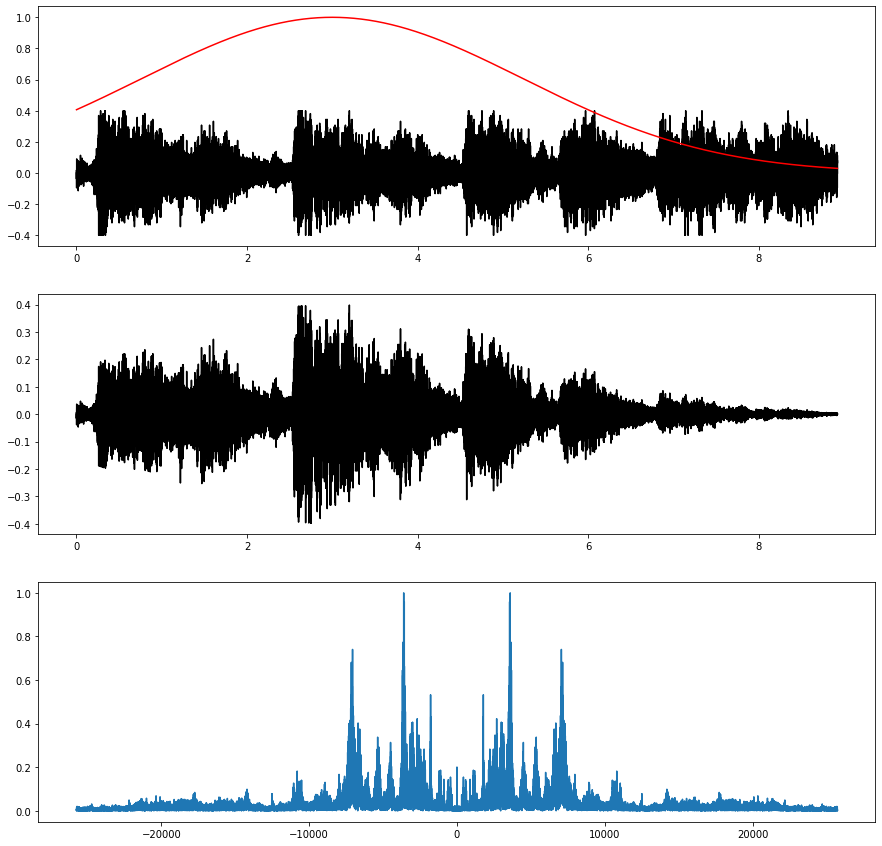

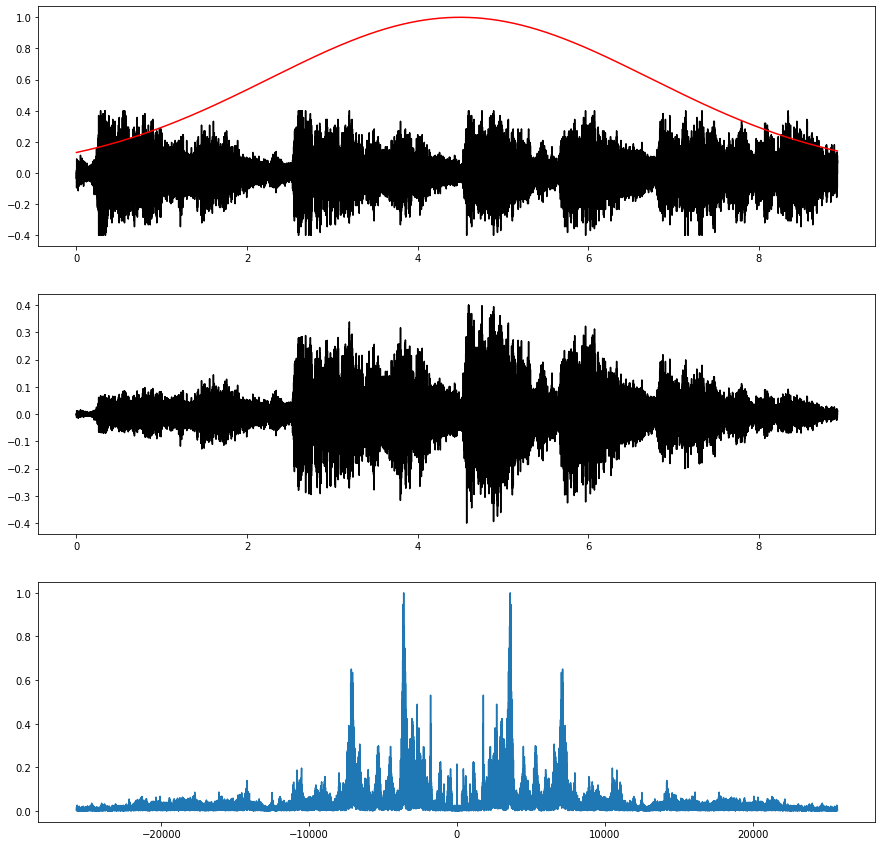

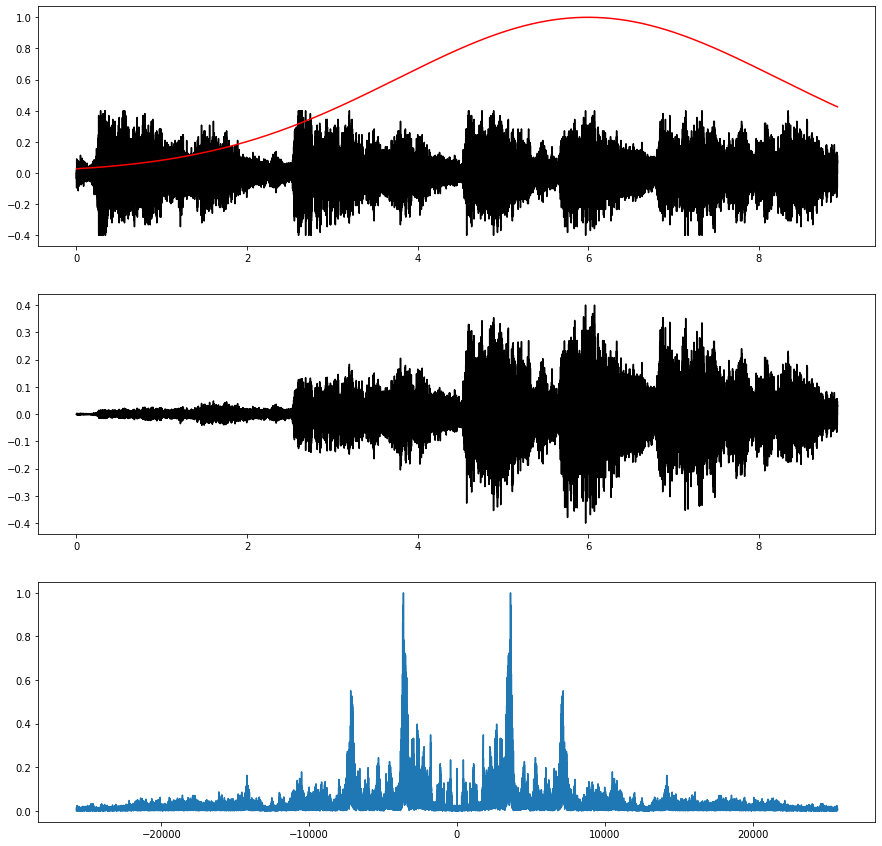

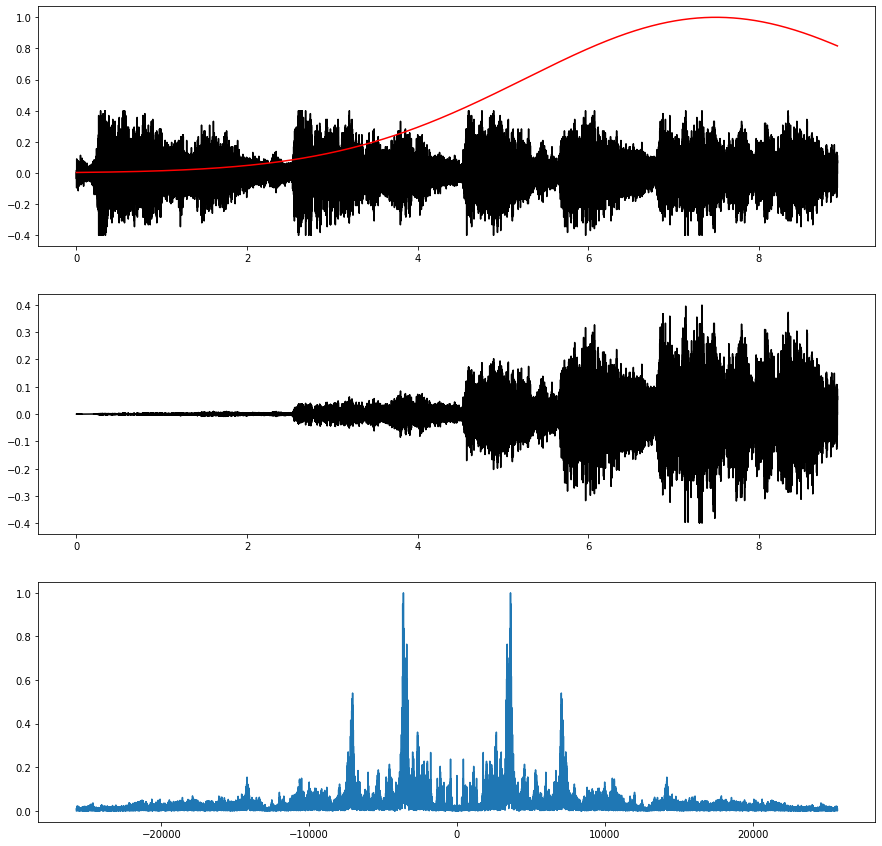

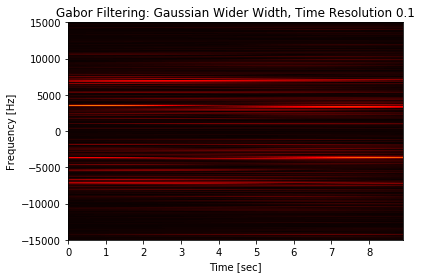

In [249]:
#Try larger Gaussian filter, time sampling 0.1
tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='gaussianB')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: Gaussian Wider Width, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

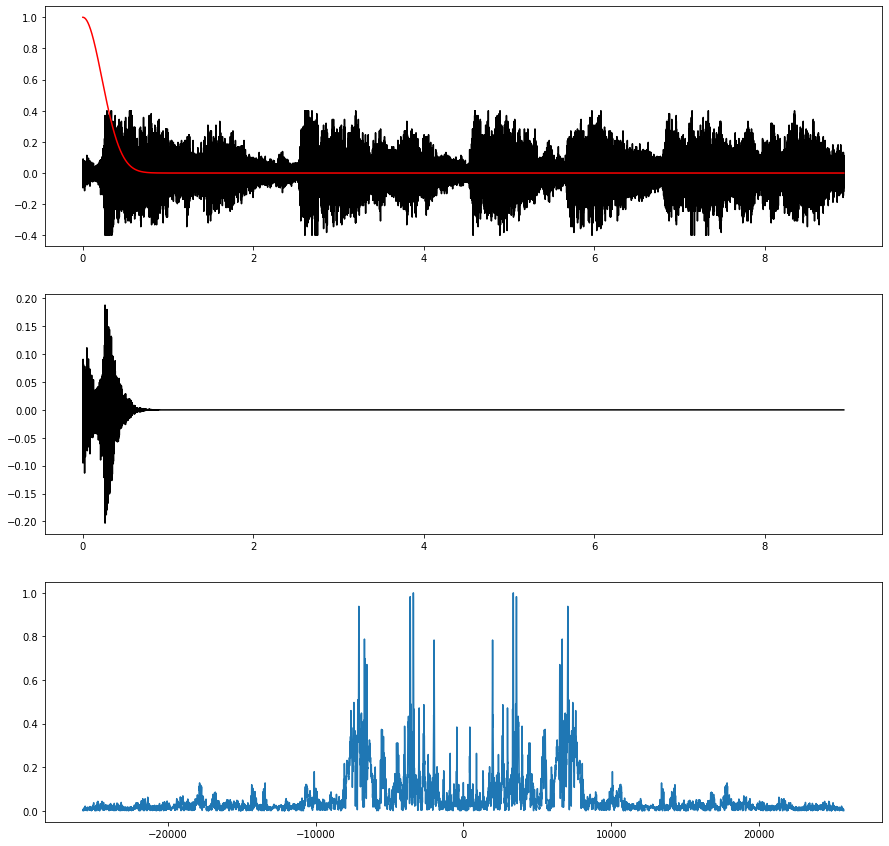

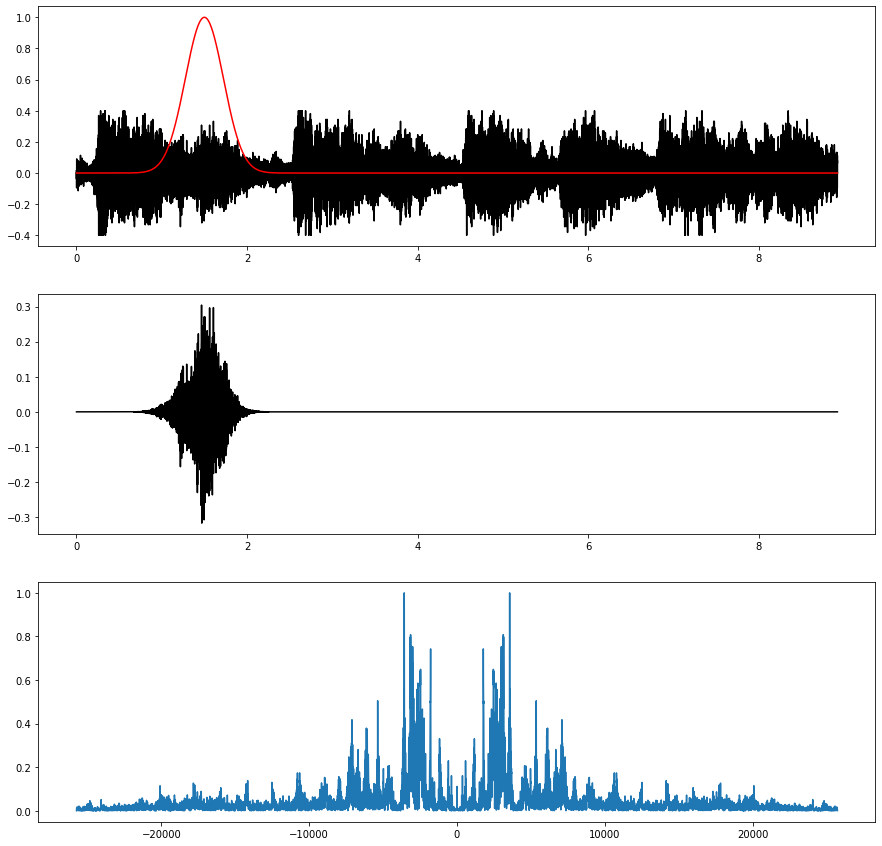

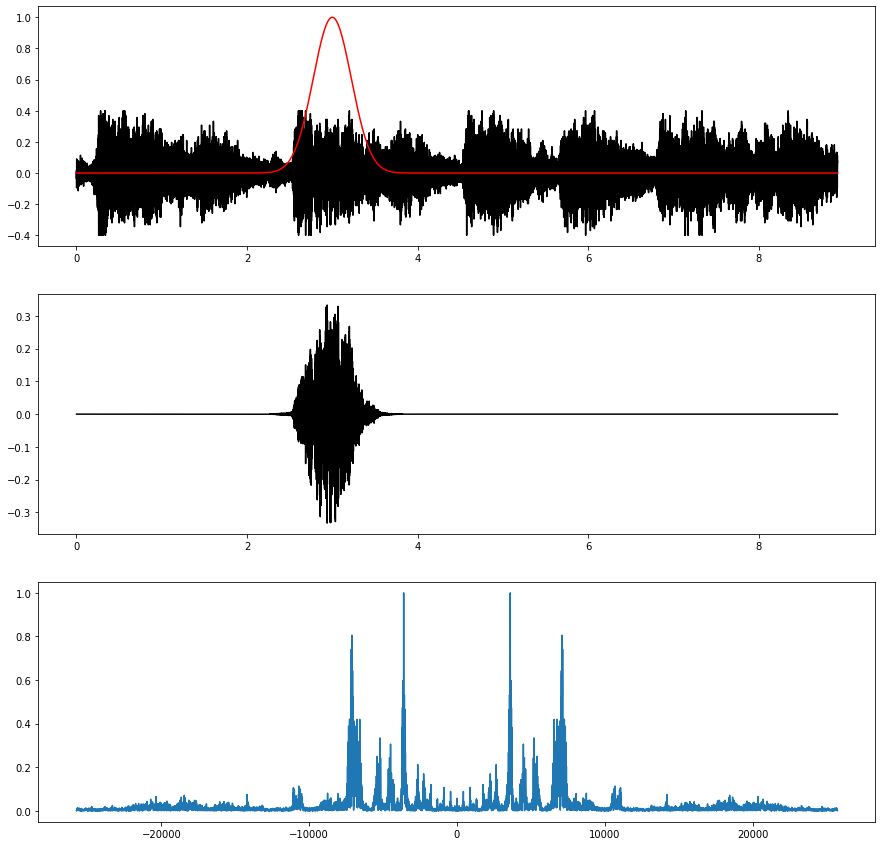

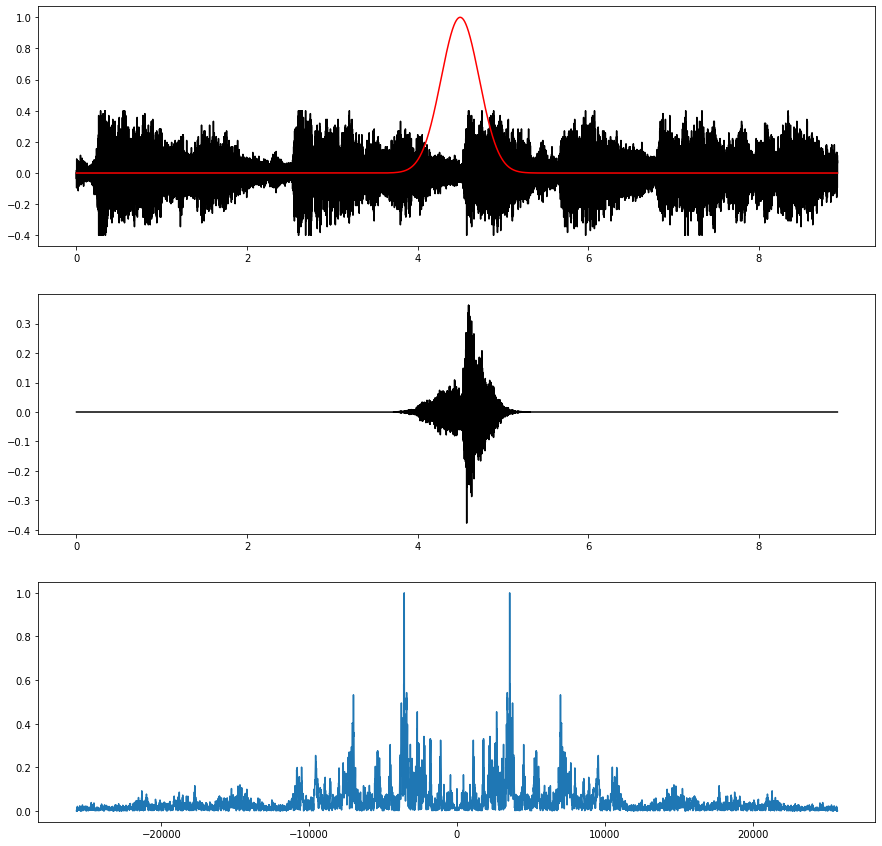

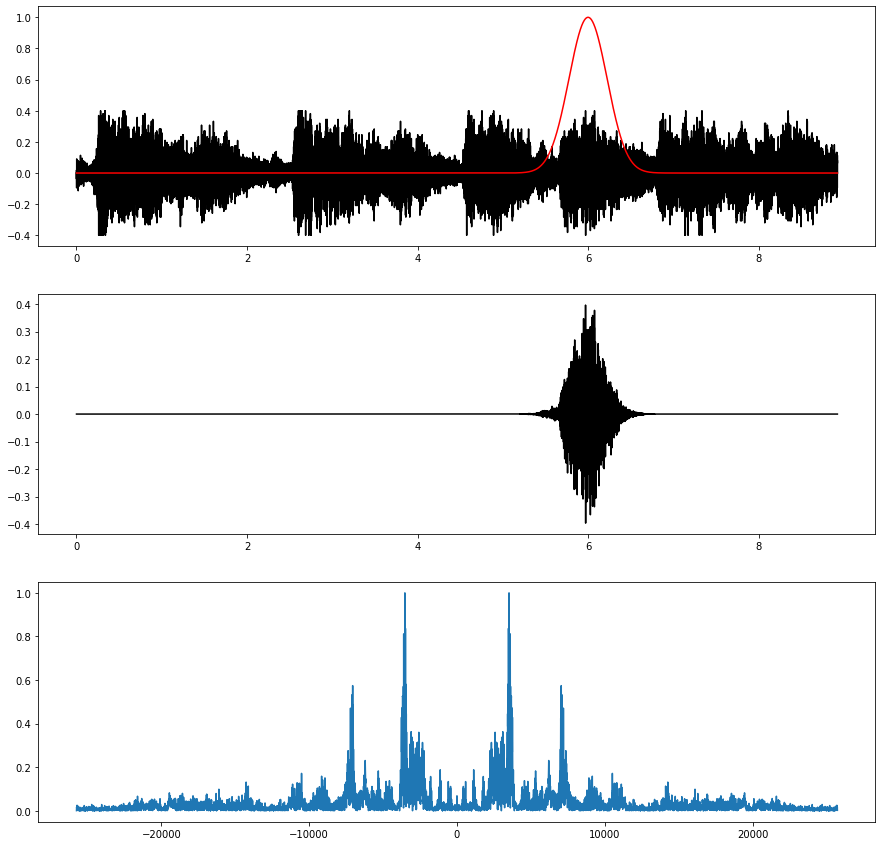

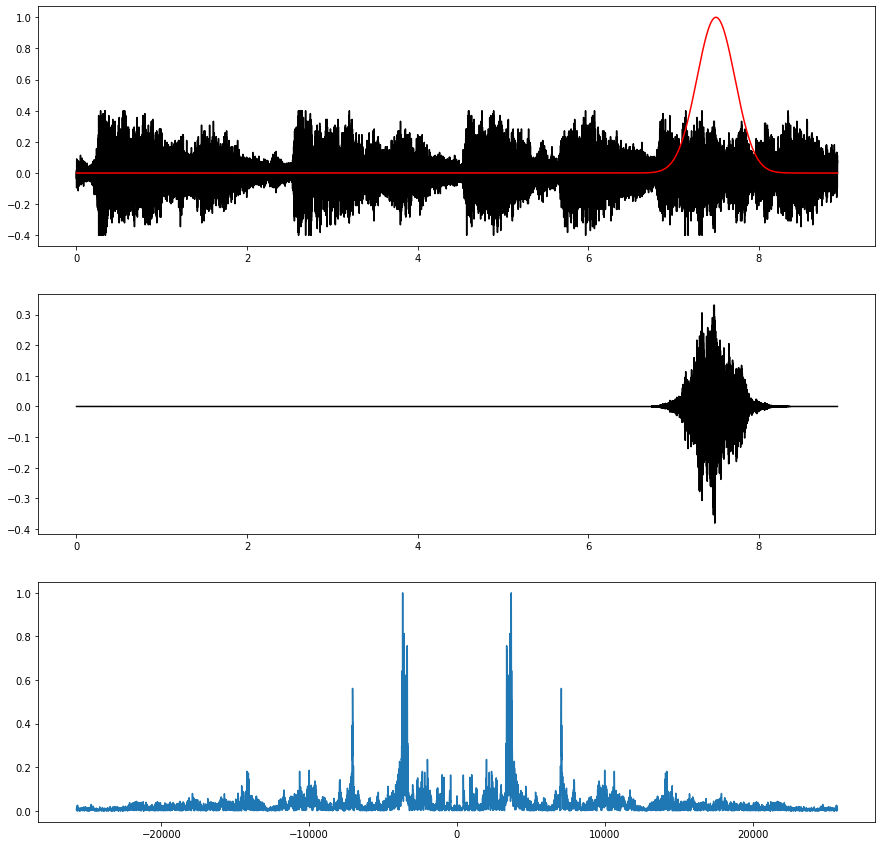

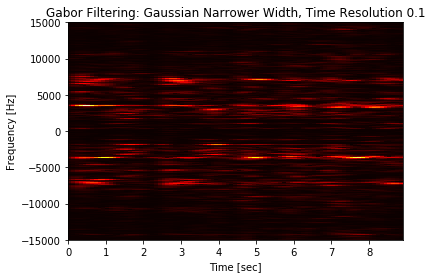

In [234]:
#Try narrower Gaussian filter, time sampling 0.1
tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='gaussianS')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: Gaussian Narrower Width, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

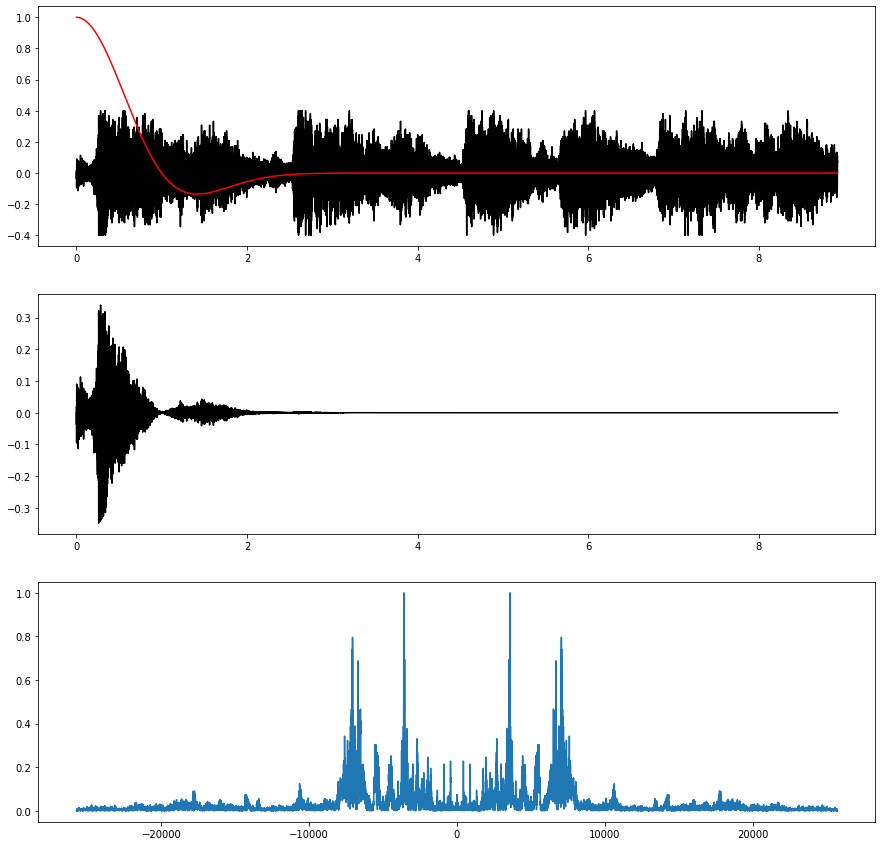

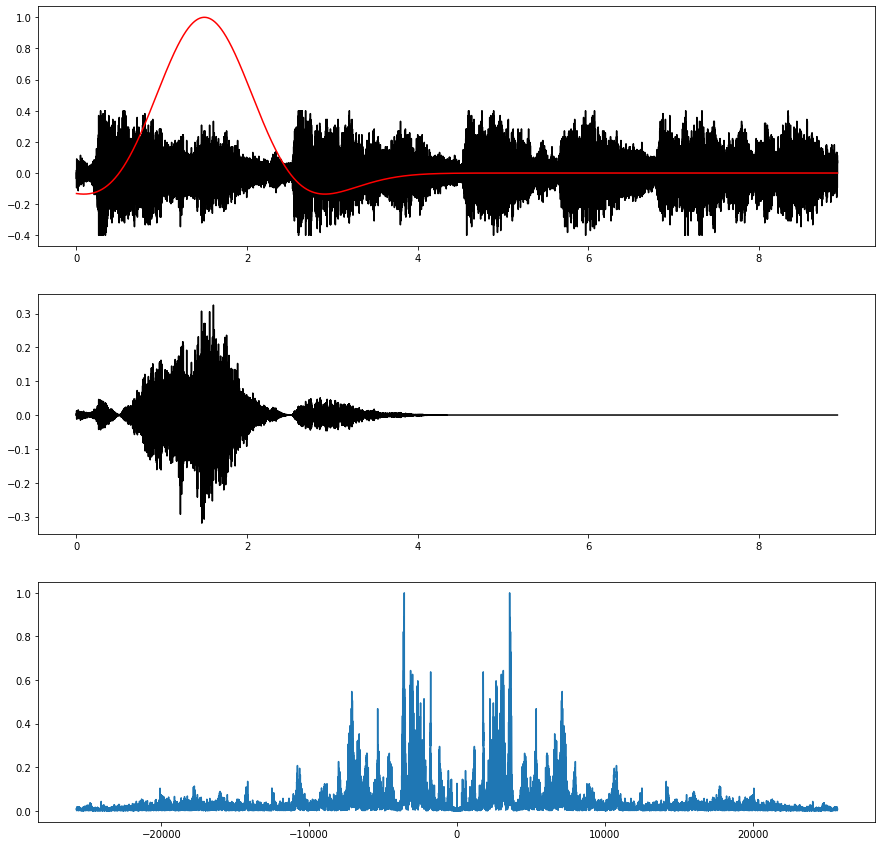

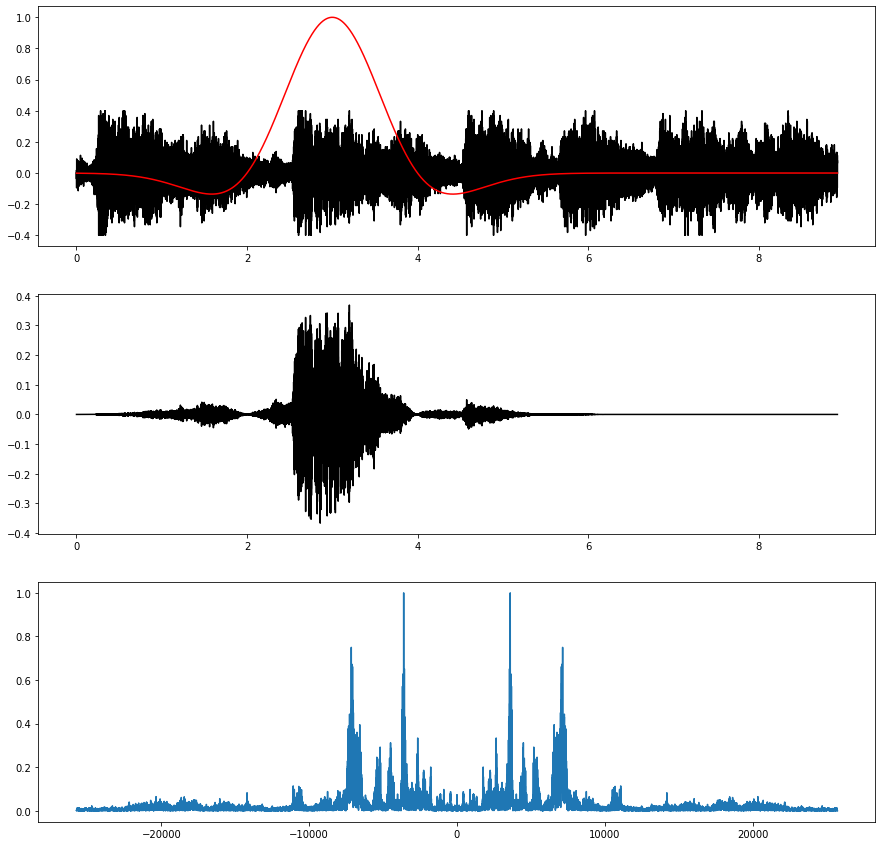

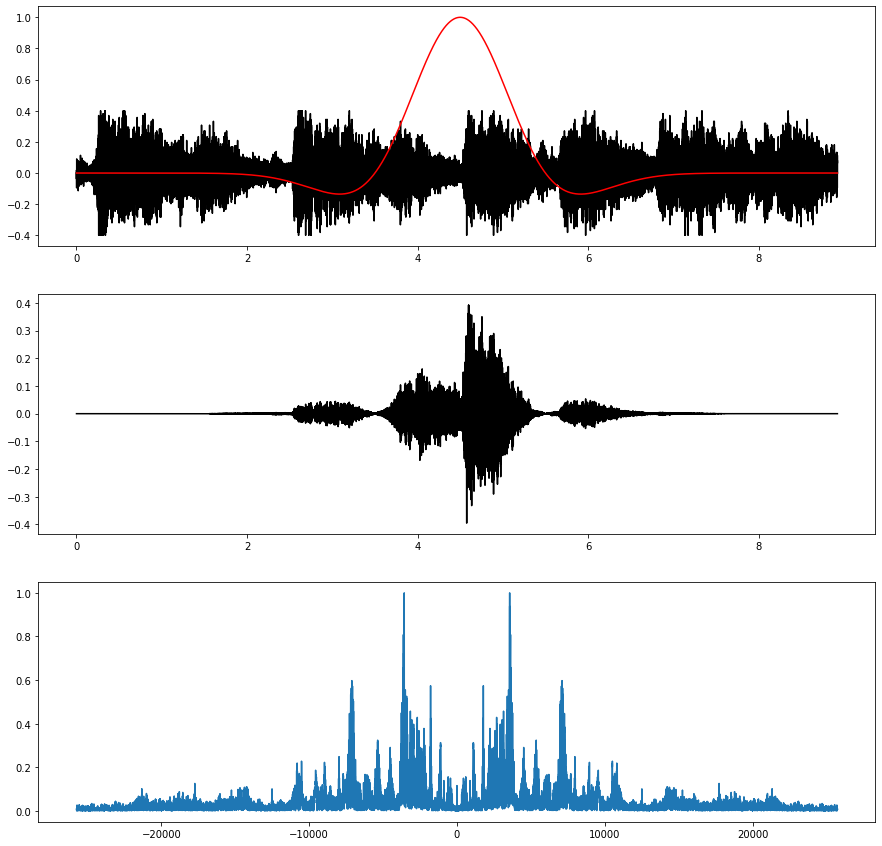

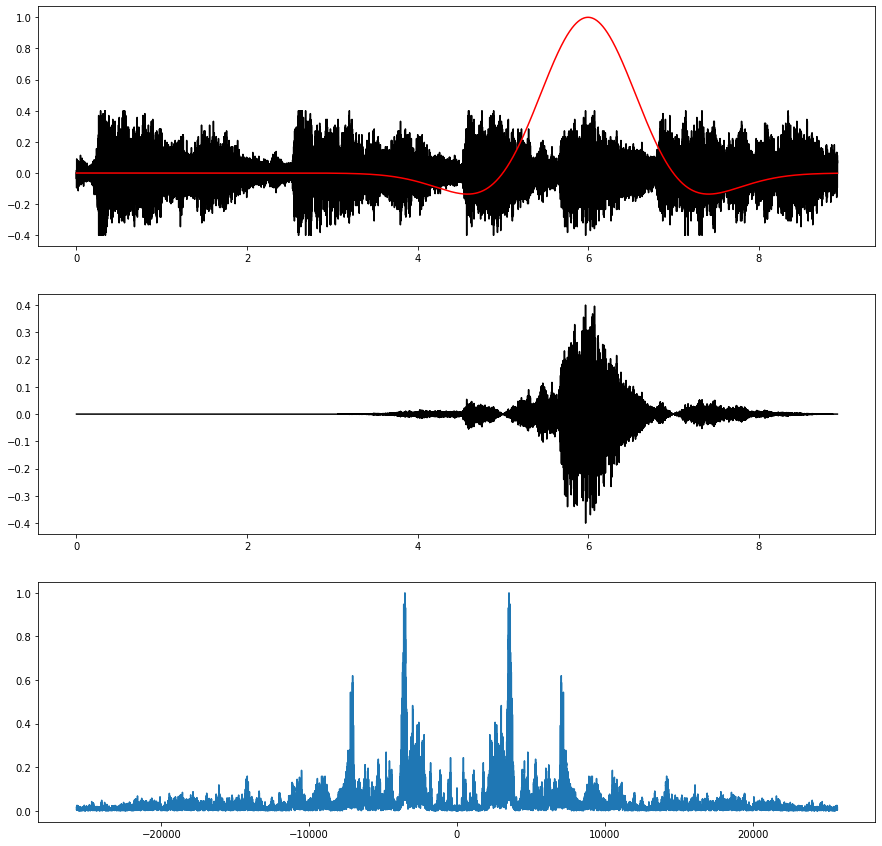

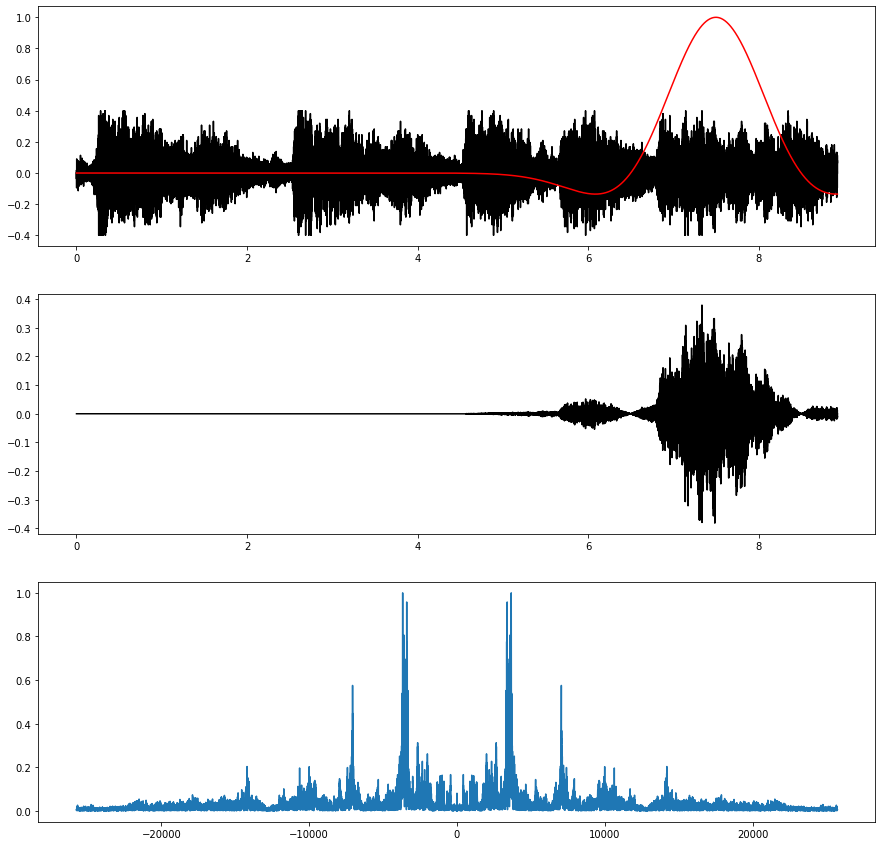

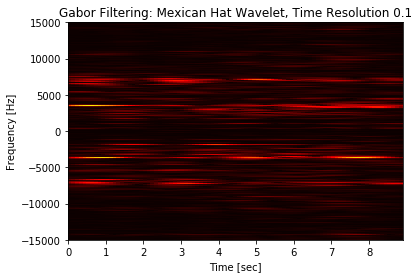

In [233]:
#Try Mexican Hat wavelet, time sampling 0.1
tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='mexicanHat')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: Mexican Hat Wavelet, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

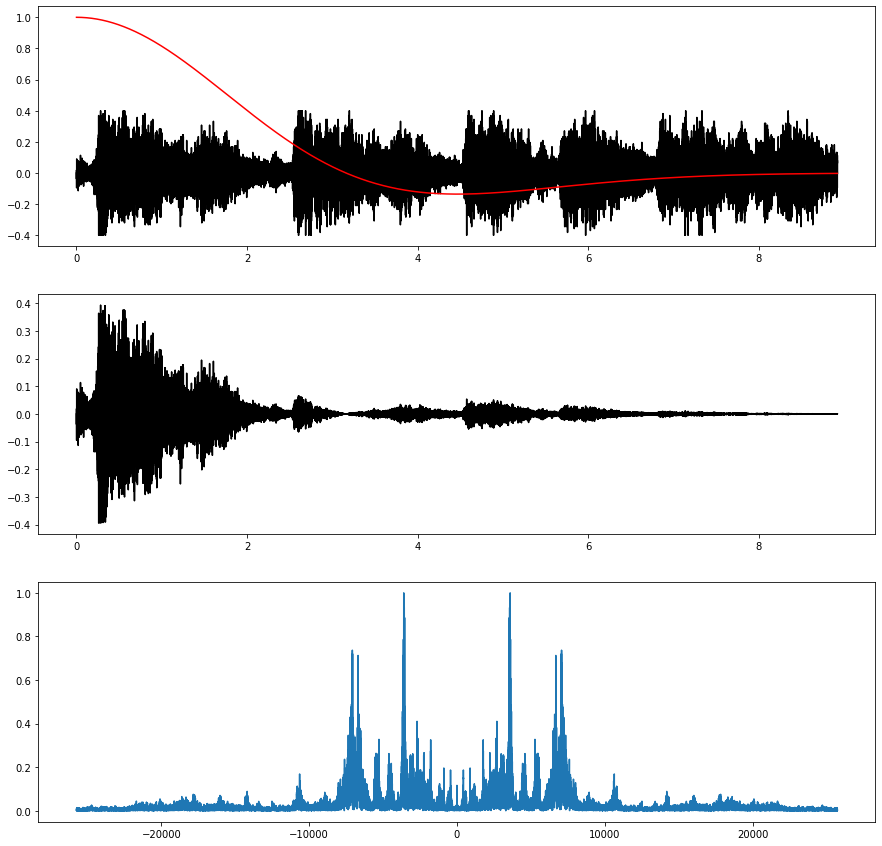

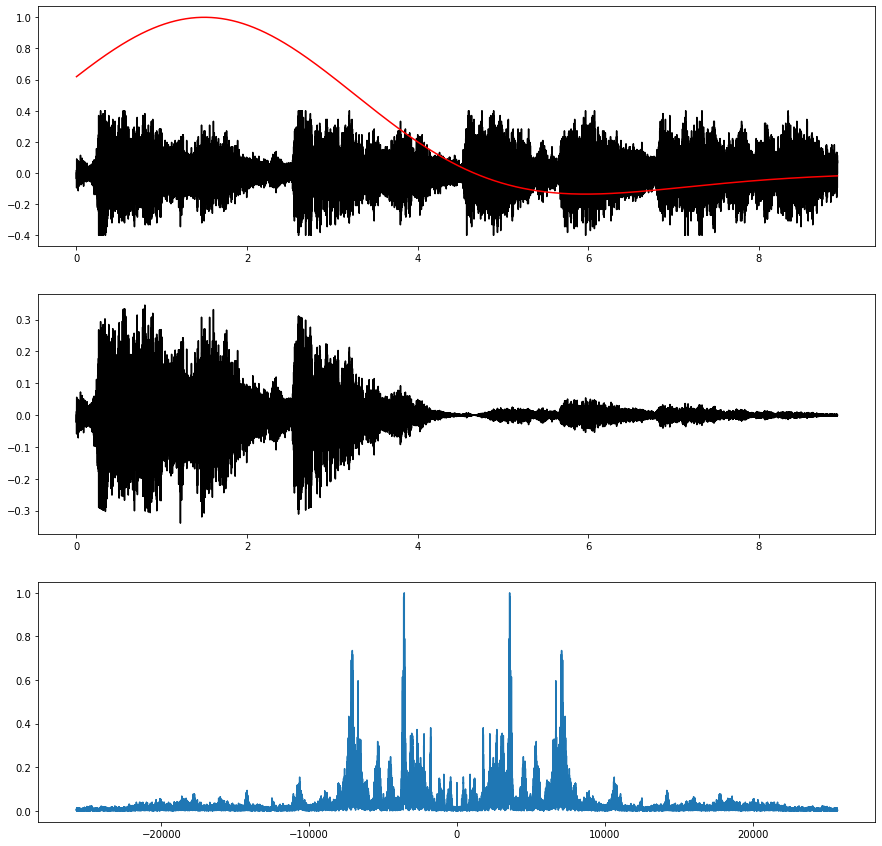

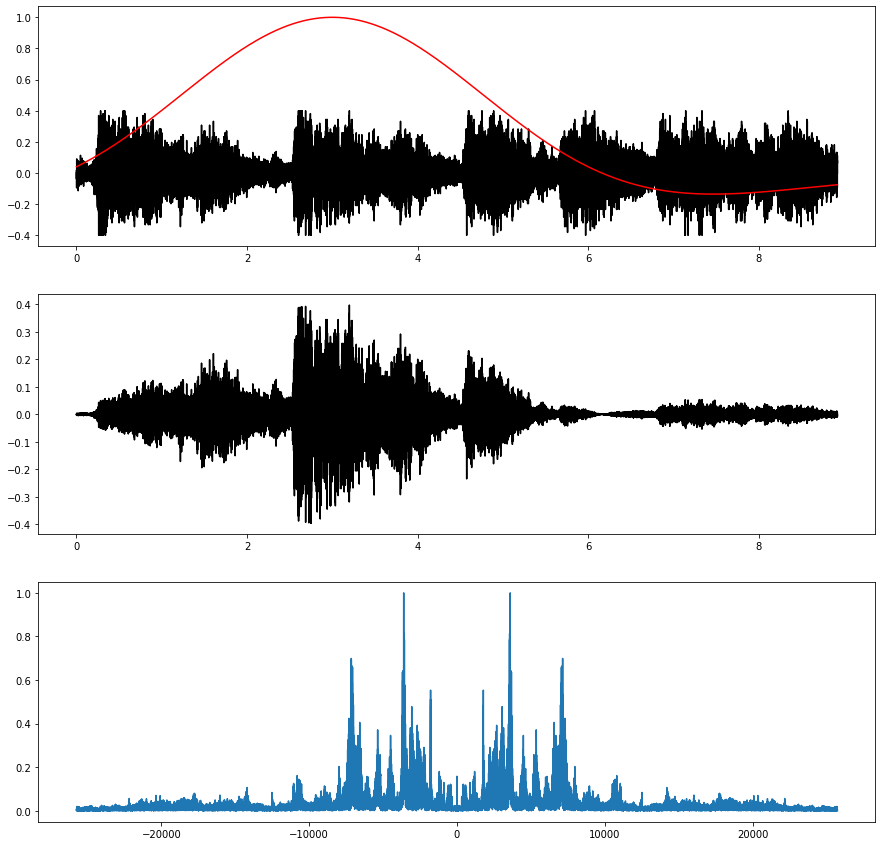

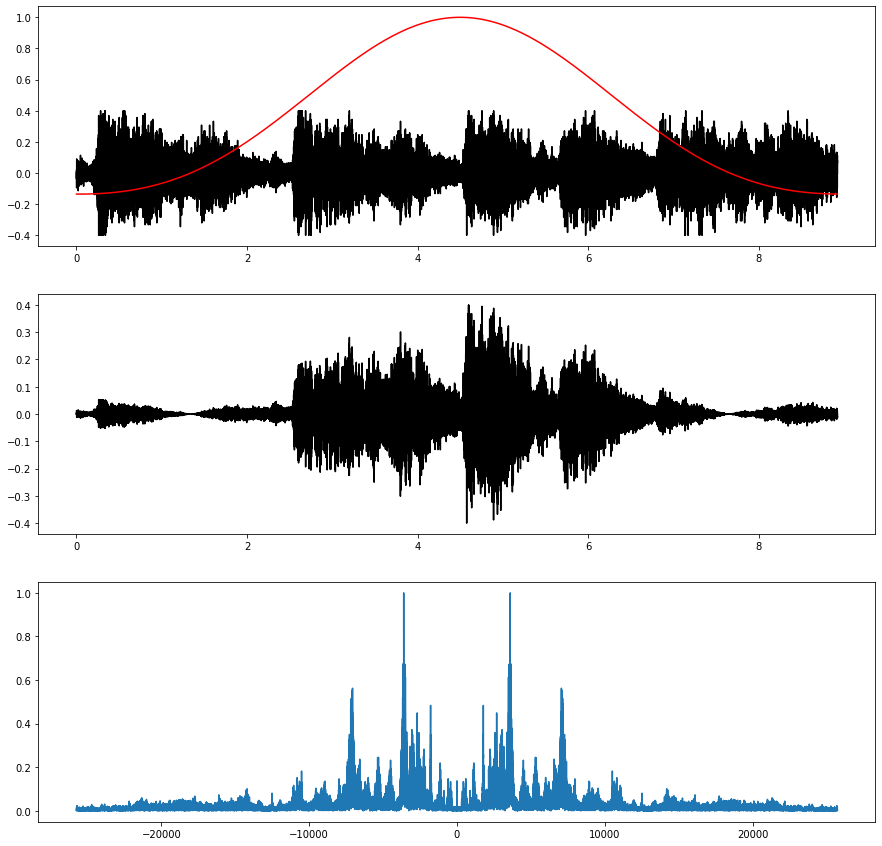

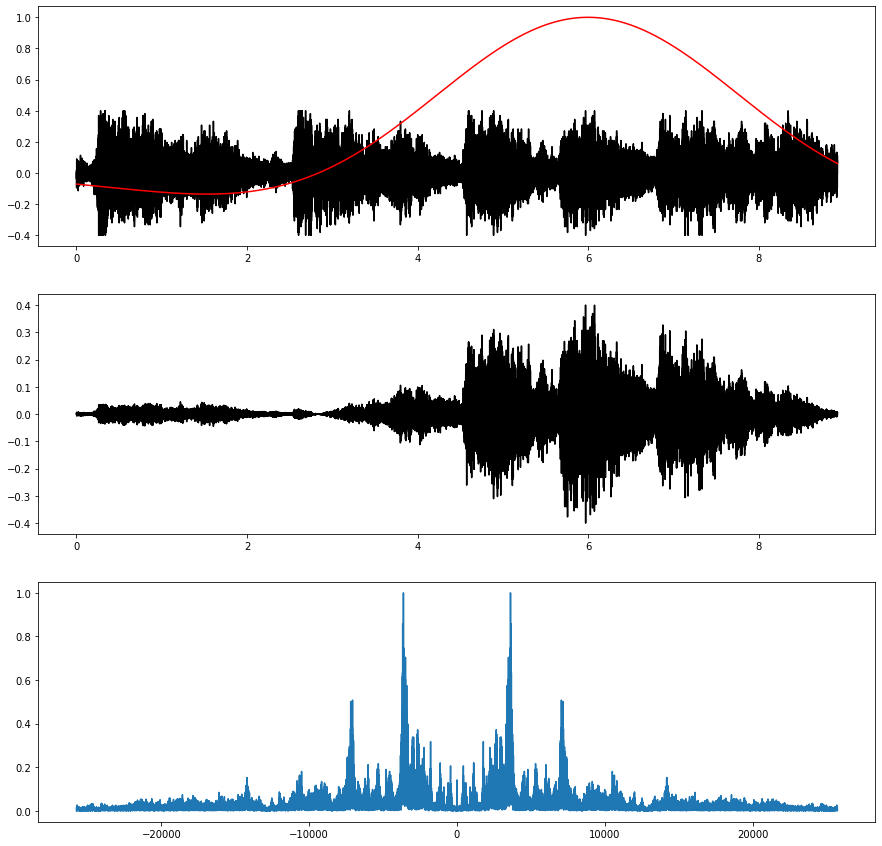

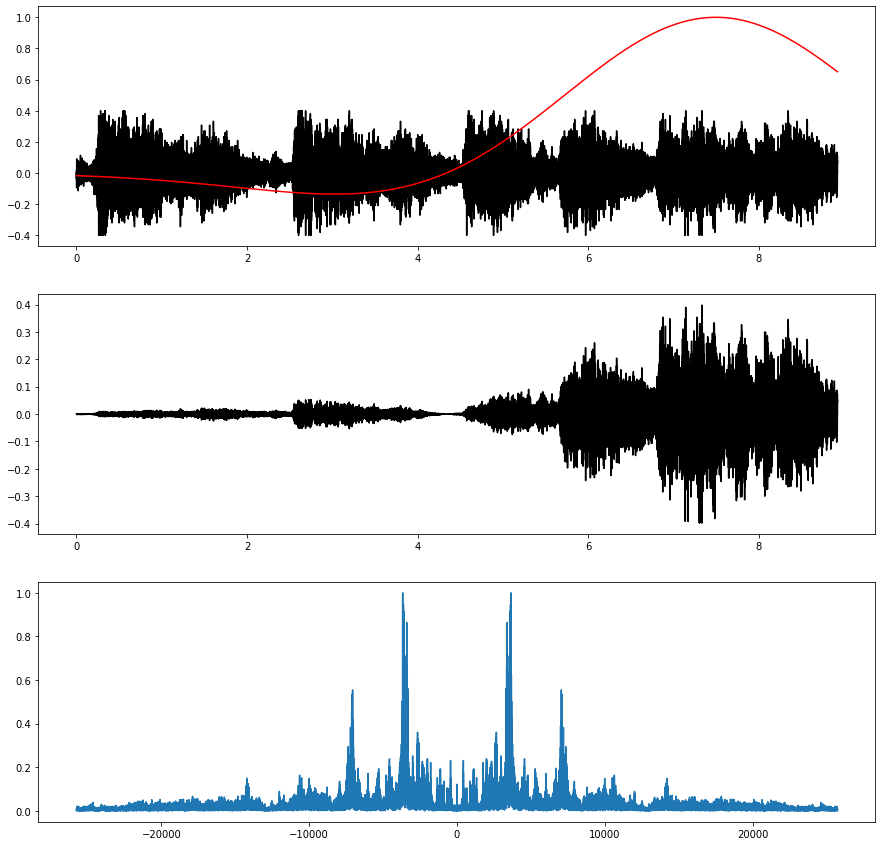

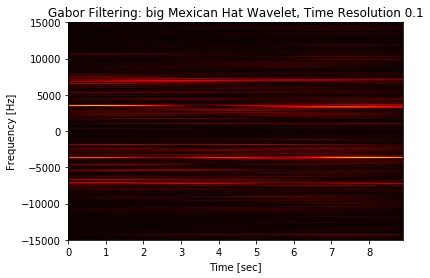

In [244]:
#Try bigger Mexican Hat wavelet, time sampling 0.1

tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='mexicanHatB')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: big Mexican Hat Wavelet, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

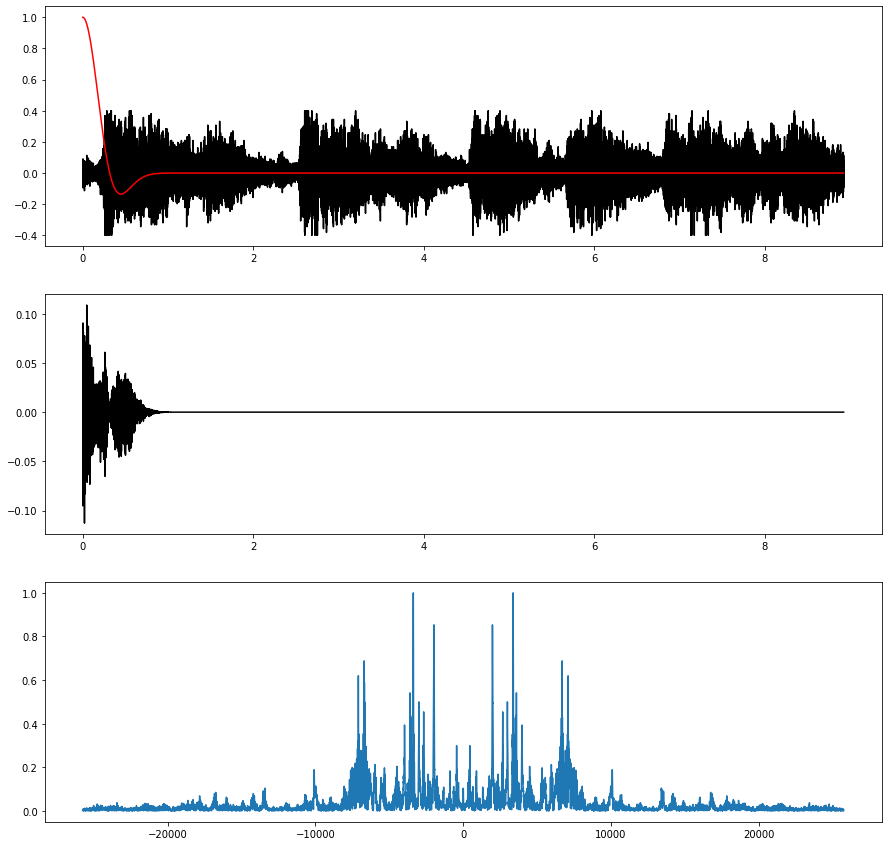

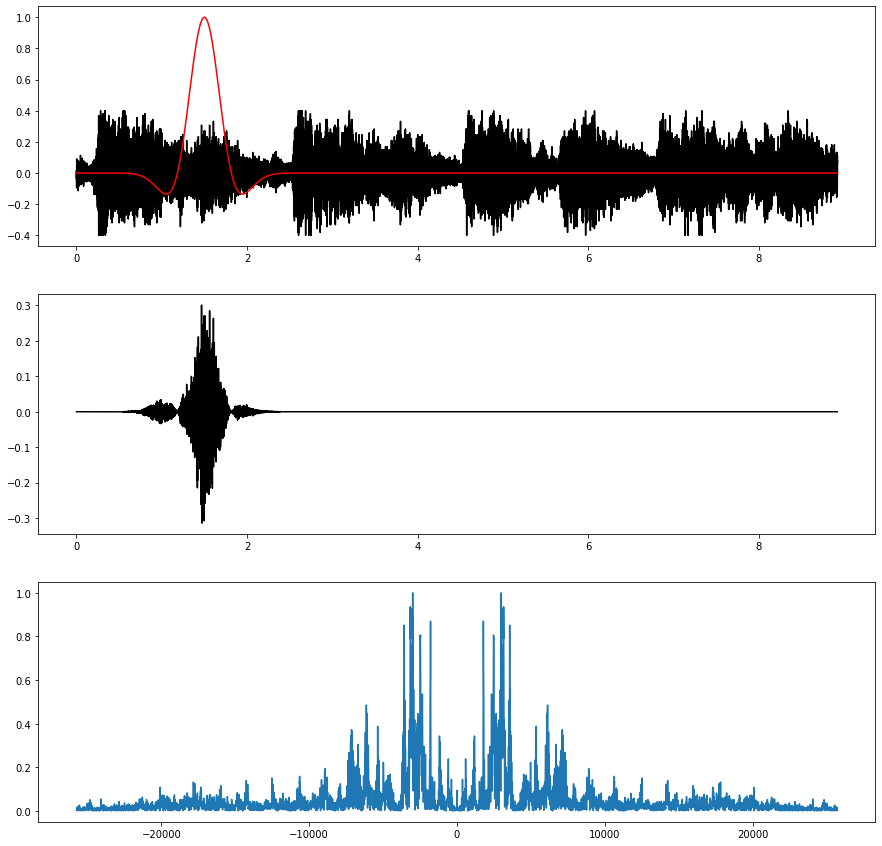

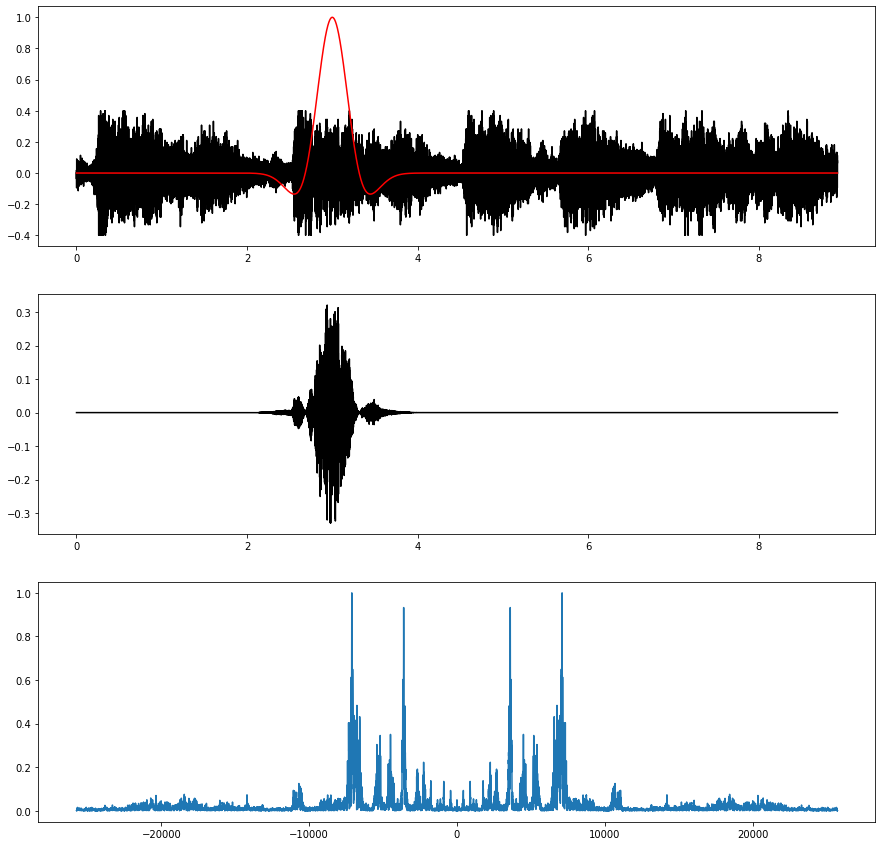

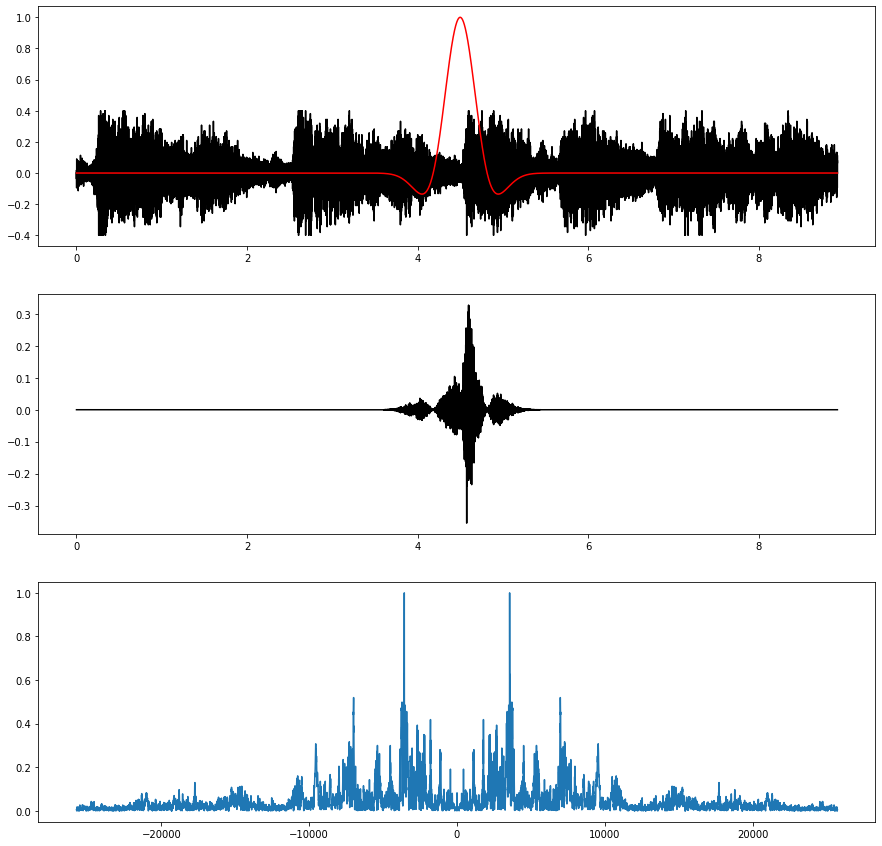

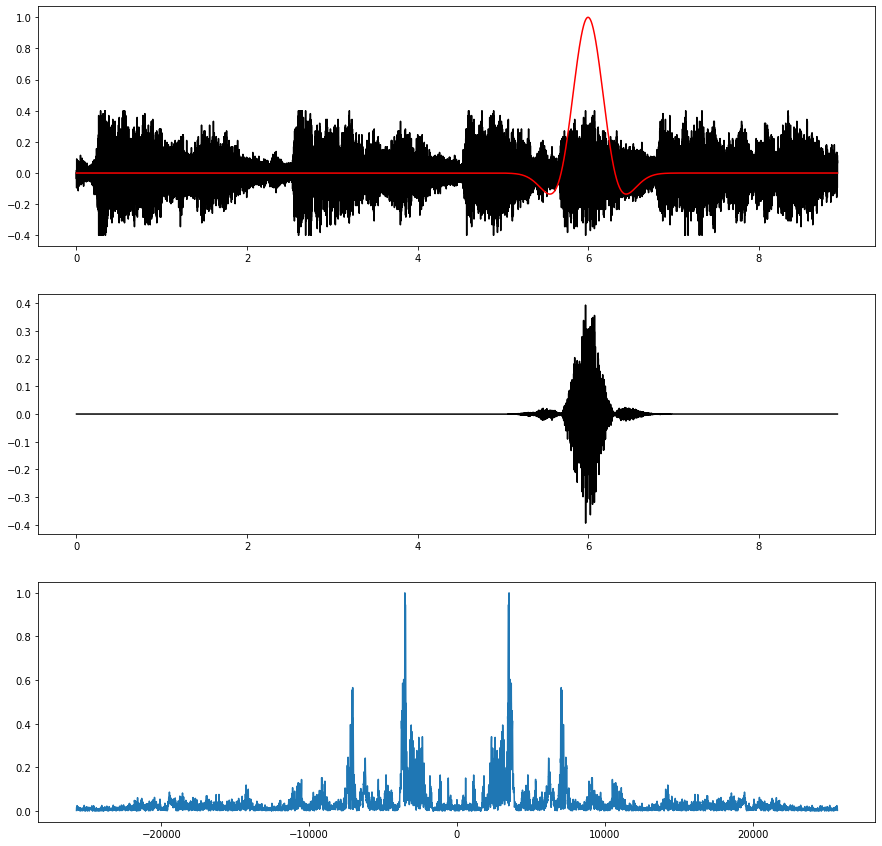

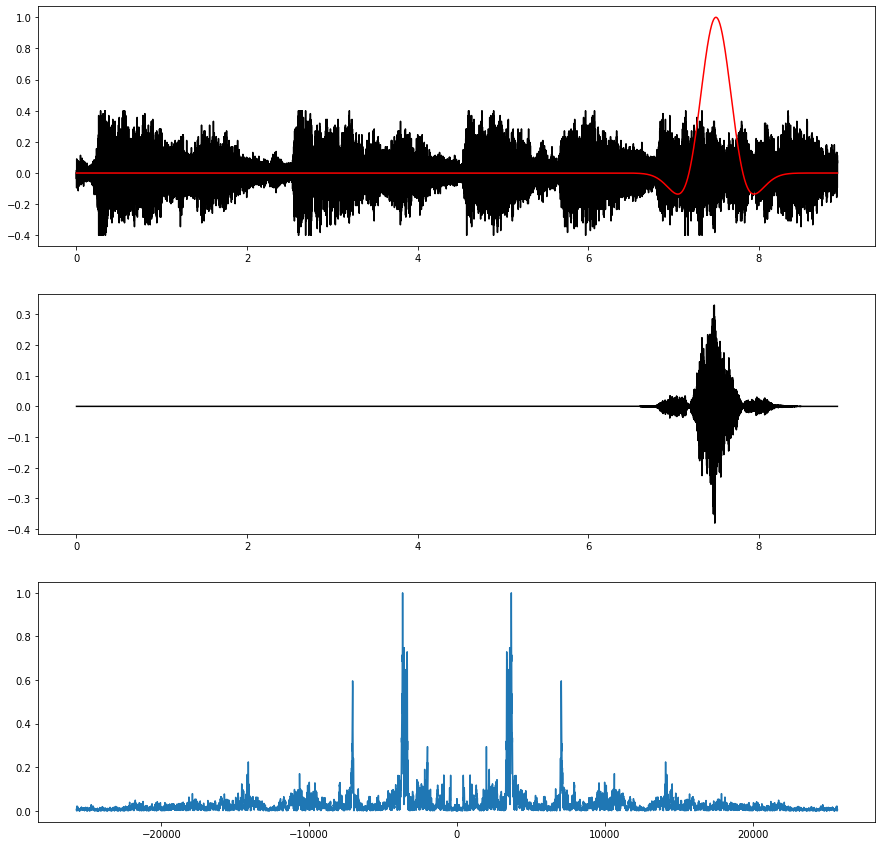

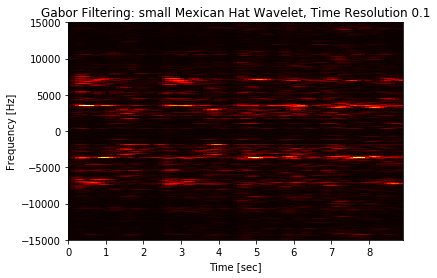

In [245]:
#Try smaller Mexican Hat wavelet, time sampling 0.1

tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='mexicanHatS')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: small Mexican Hat Wavelet, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

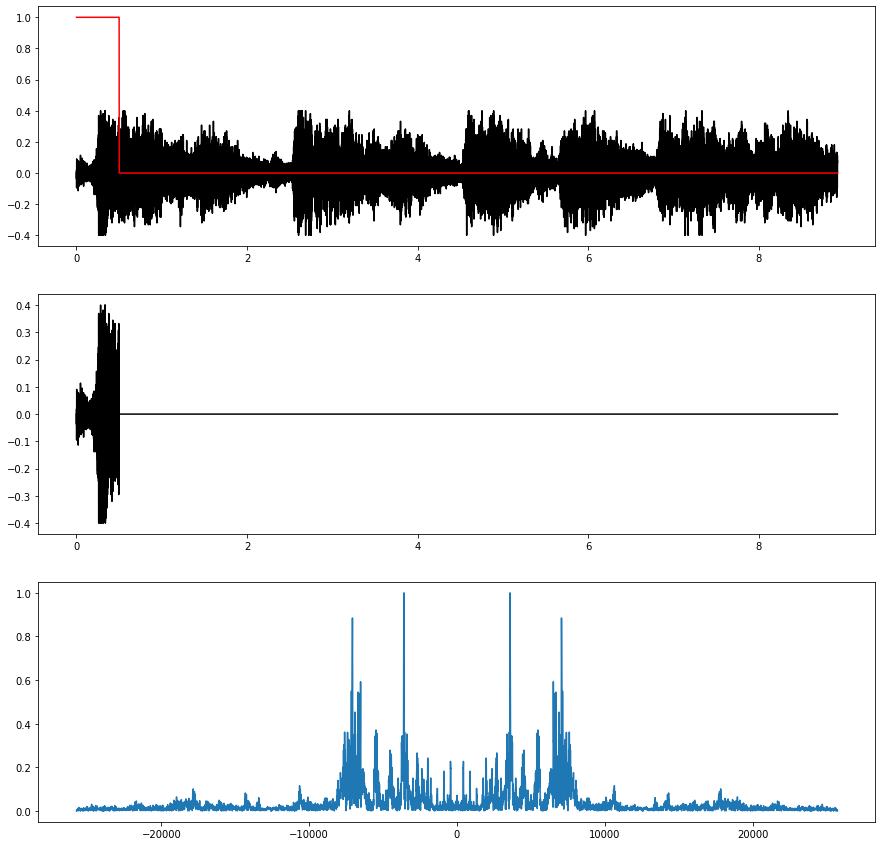

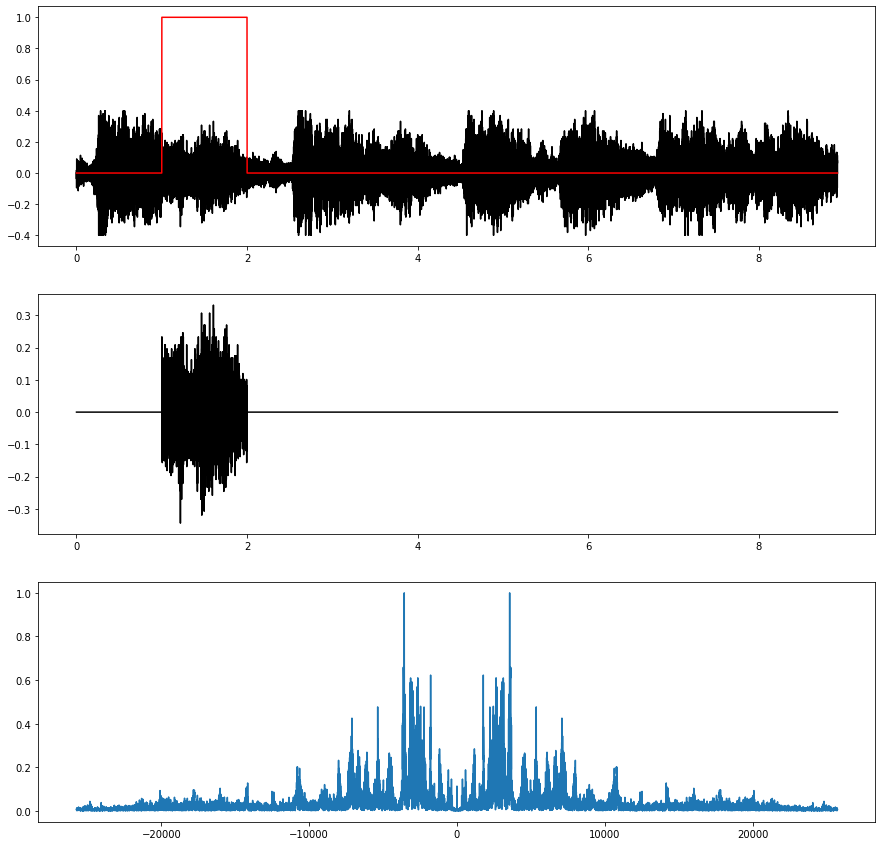

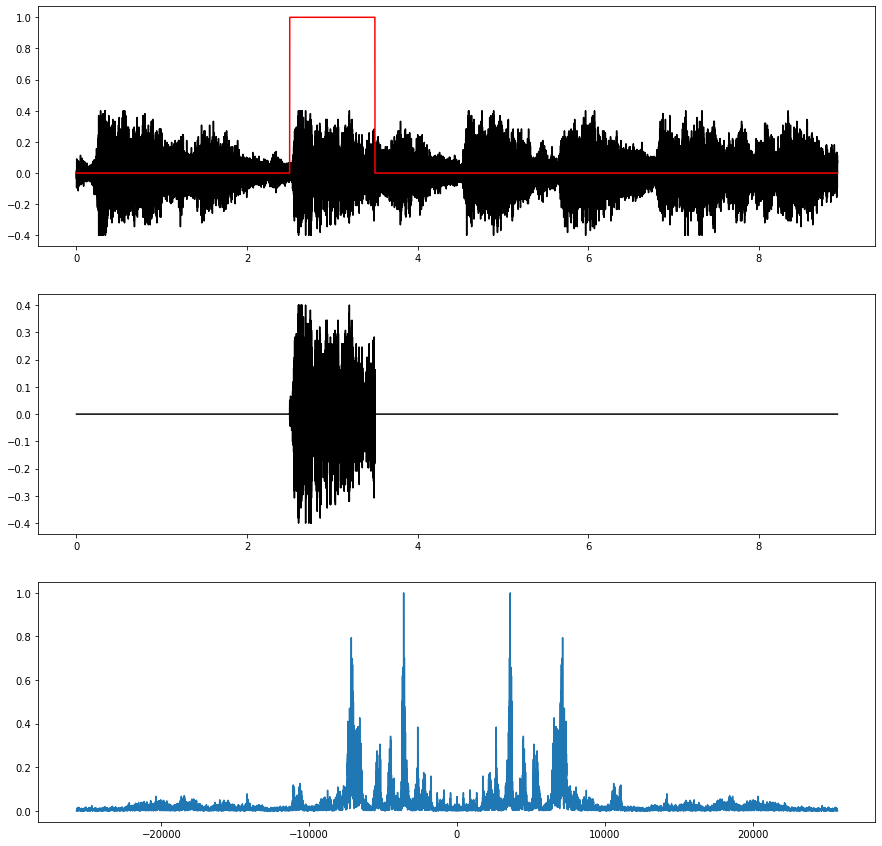

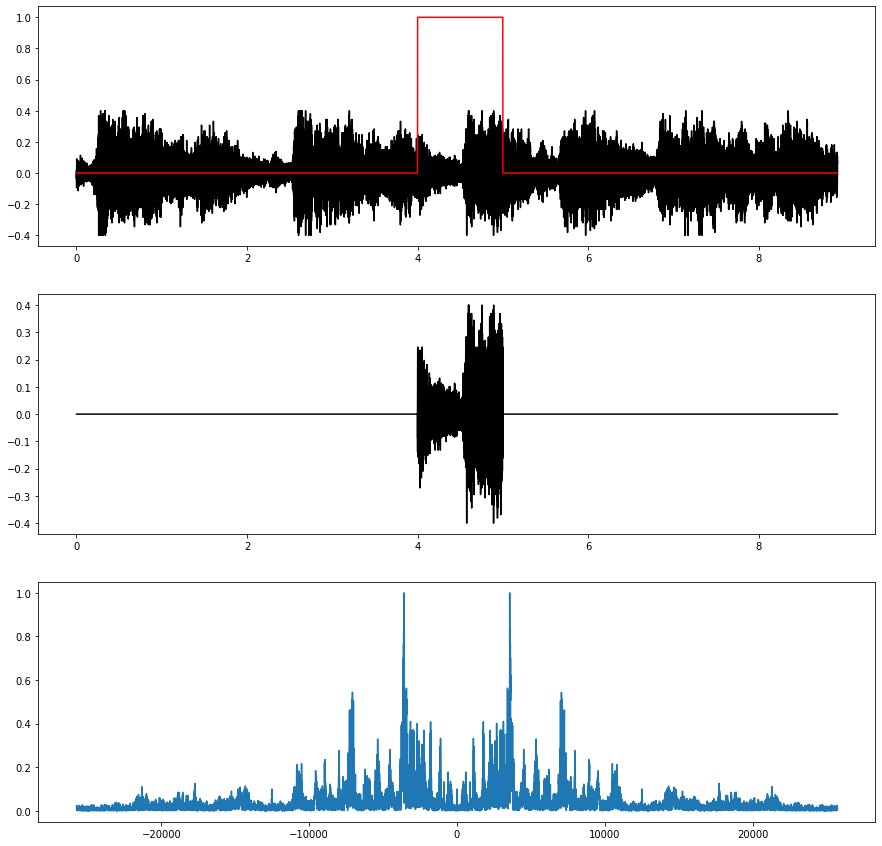

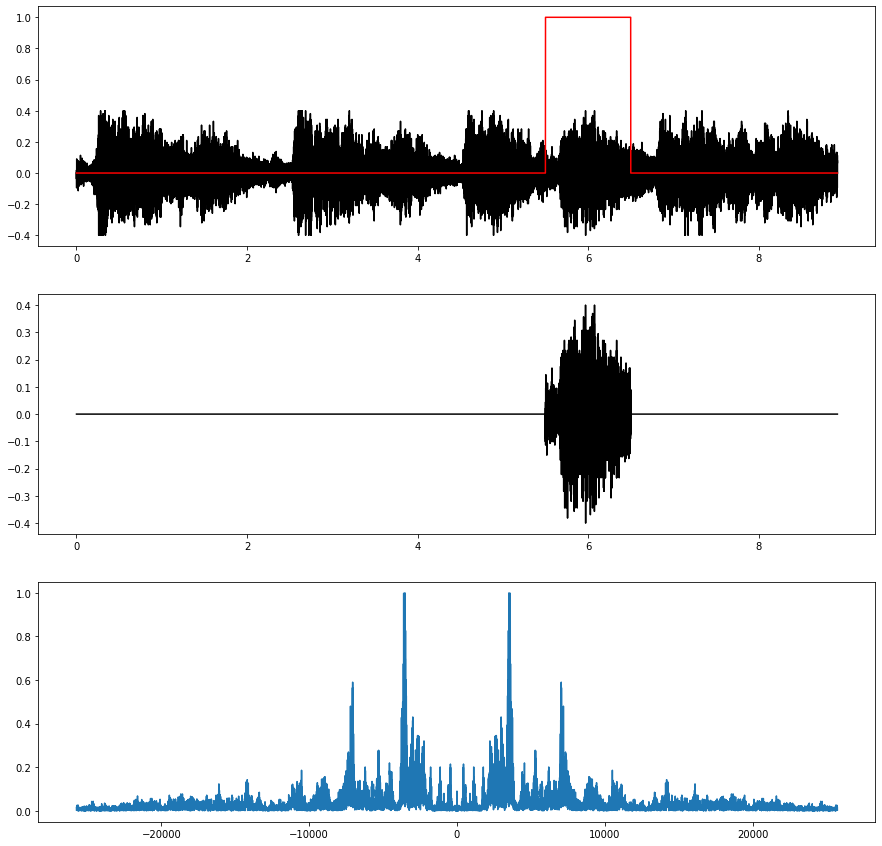

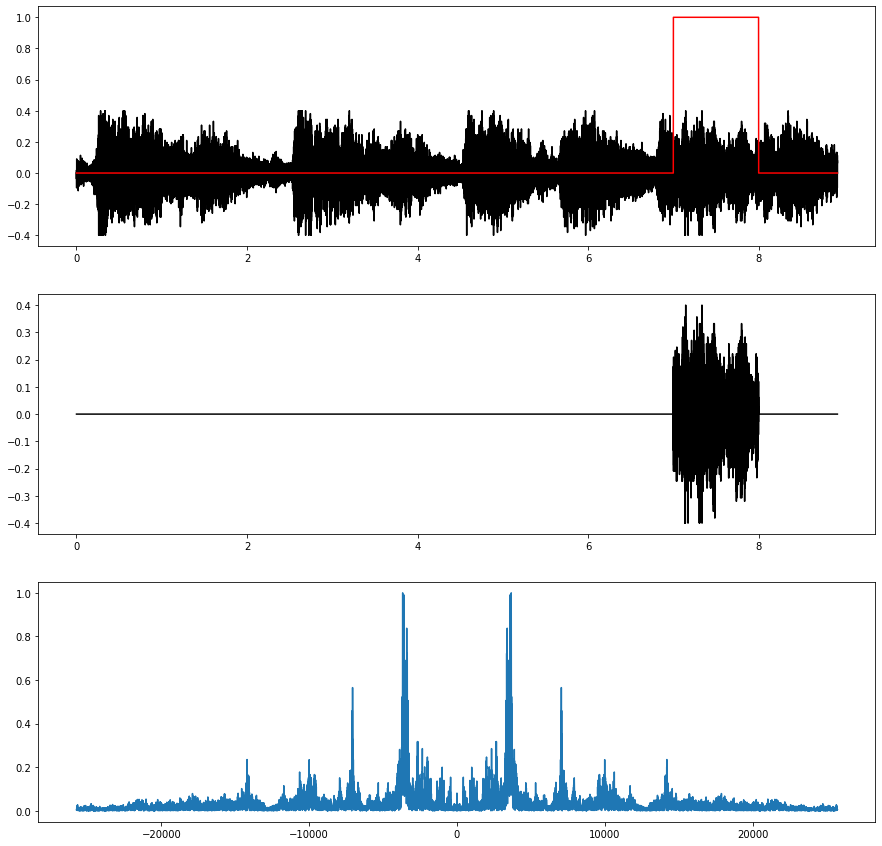

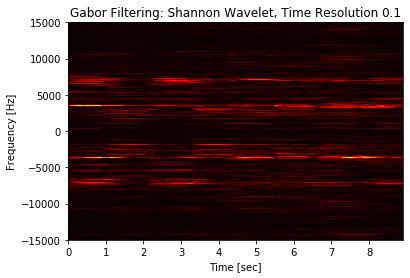

In [246]:
#Try Shannon wavelet, time sampling 0.1

tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='shannon')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: Shannon Wavelet, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

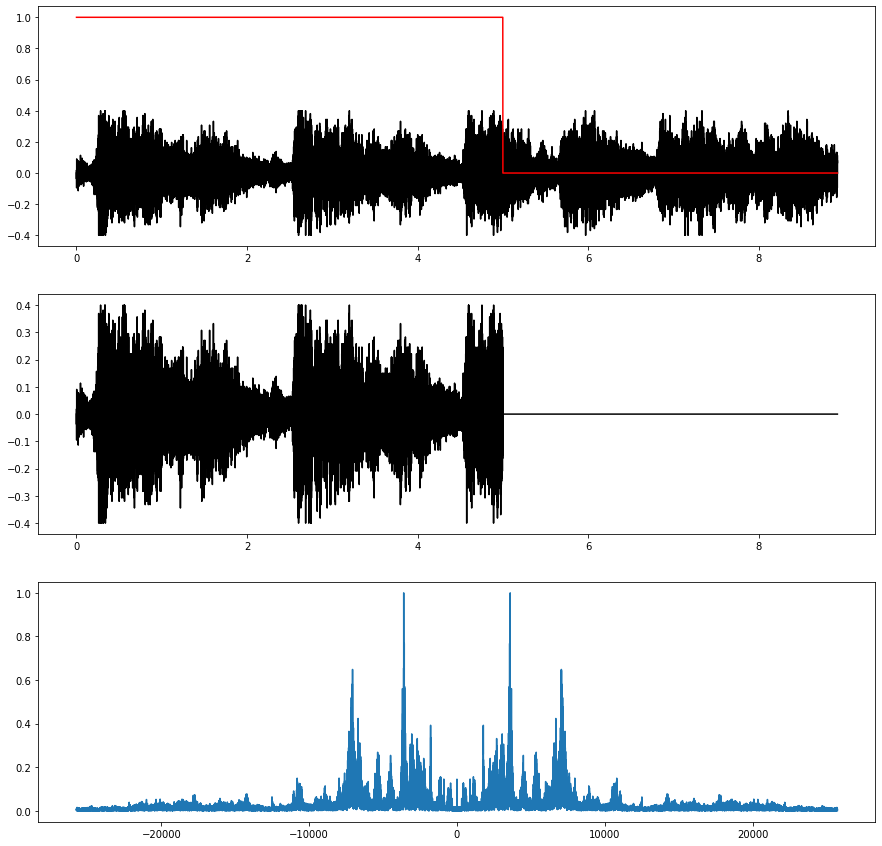

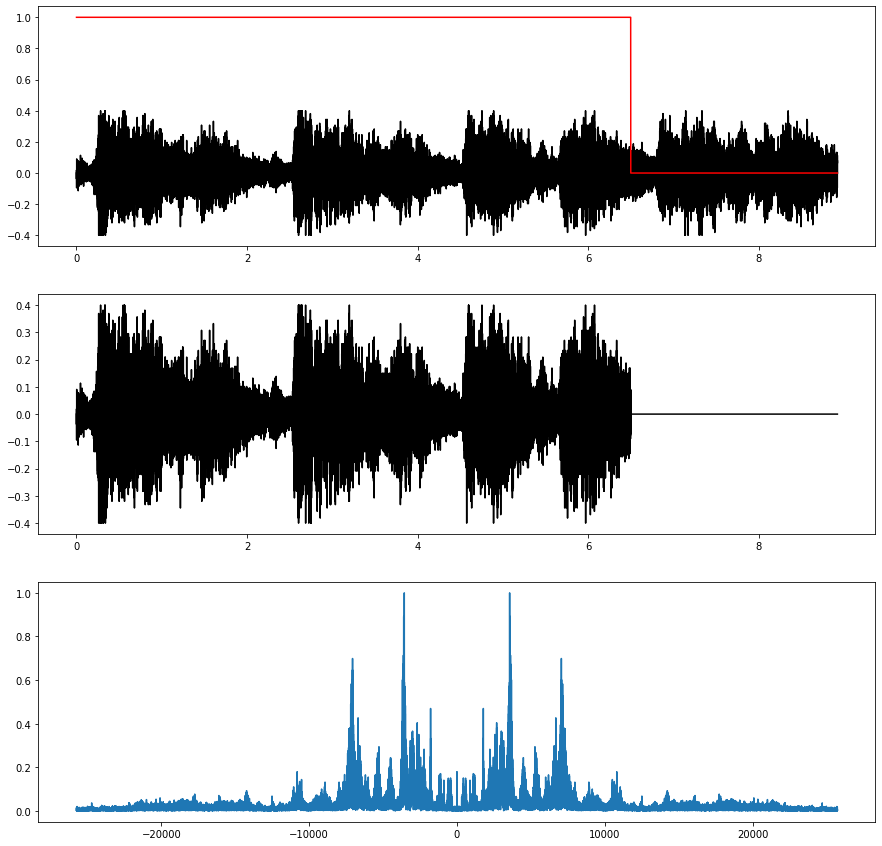

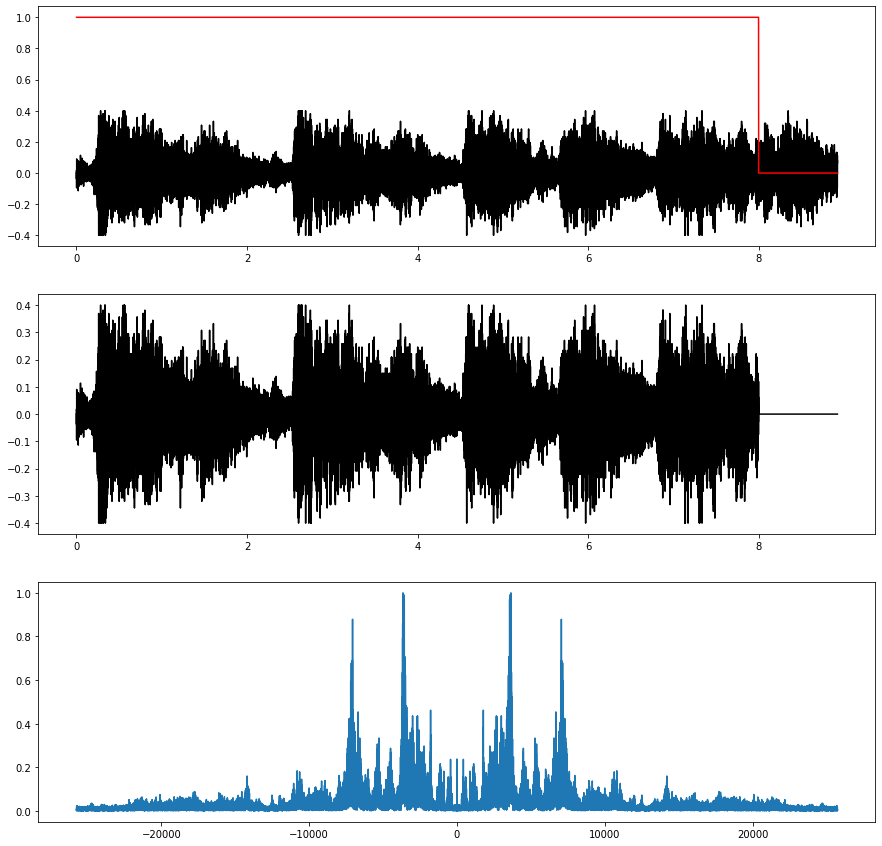

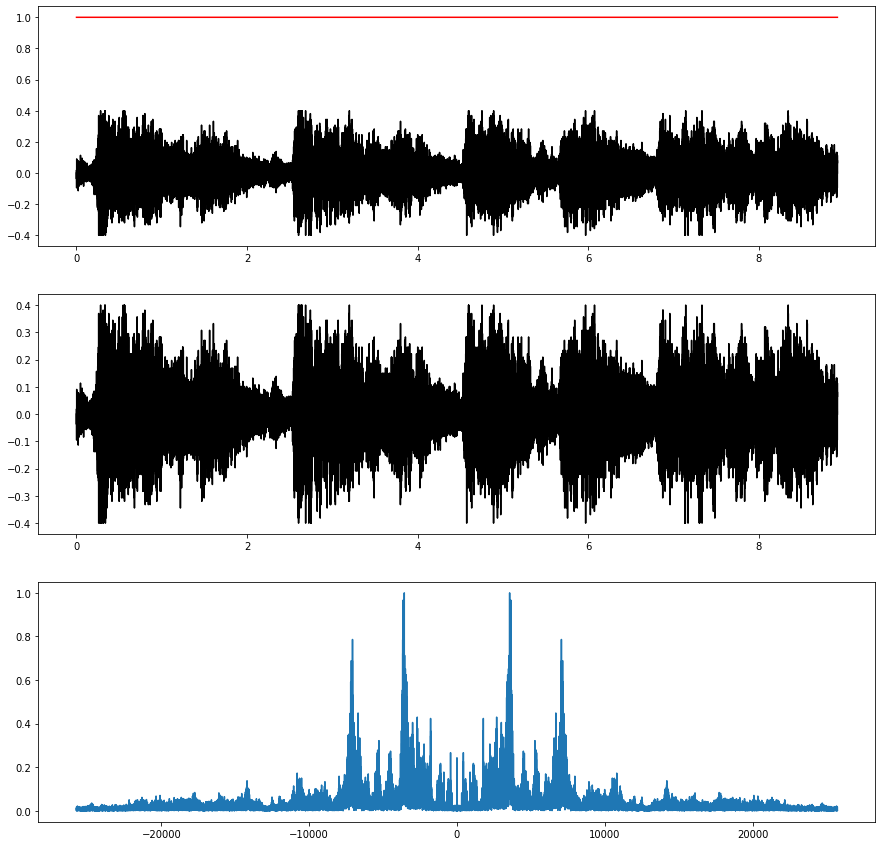

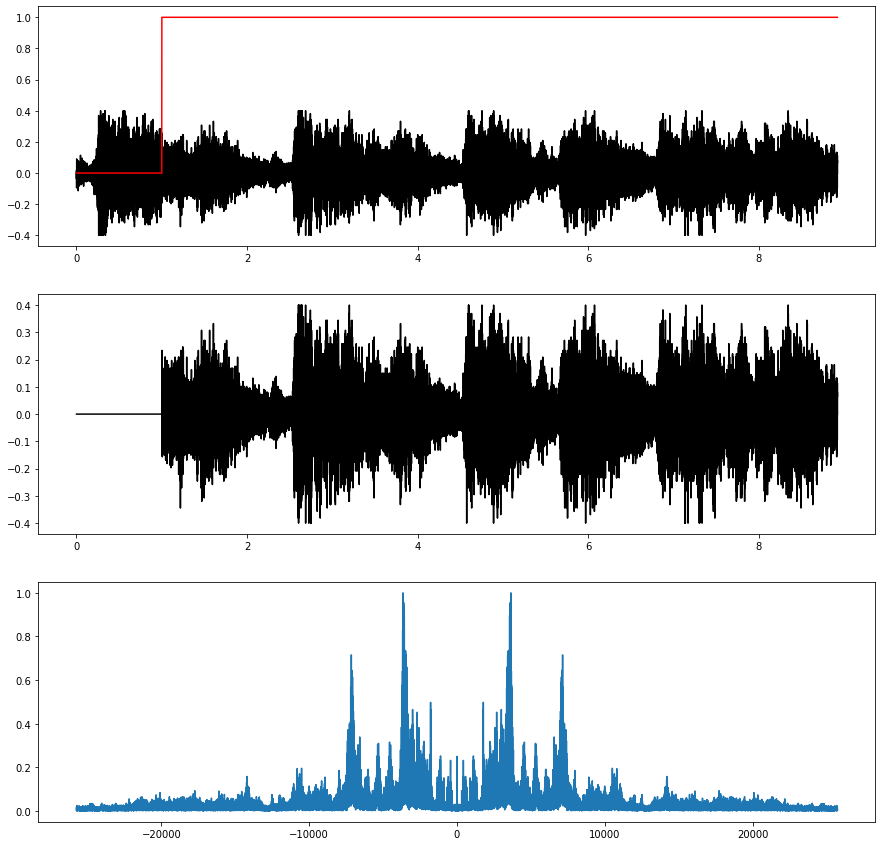

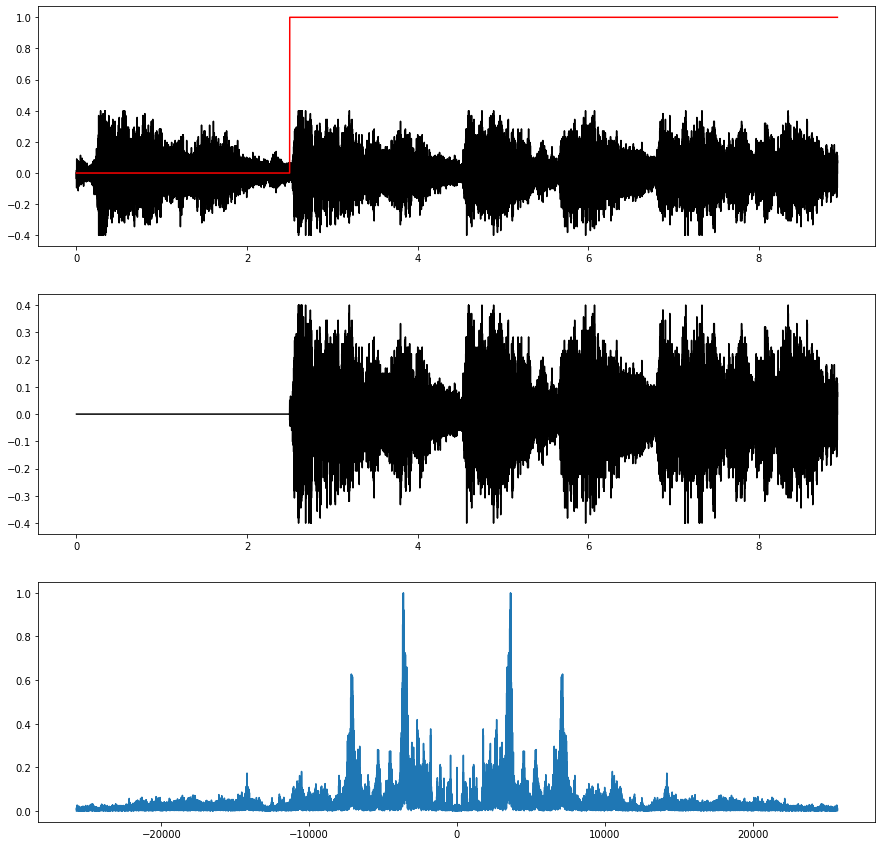

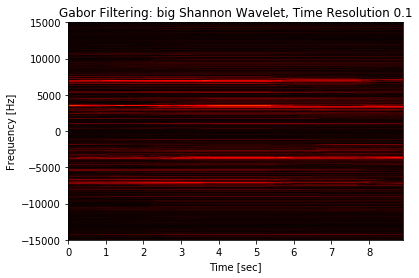

In [247]:
#Try bigger Shannon wavelet, time sampling 0.1

tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='shannonB')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: big Shannon Wavelet, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

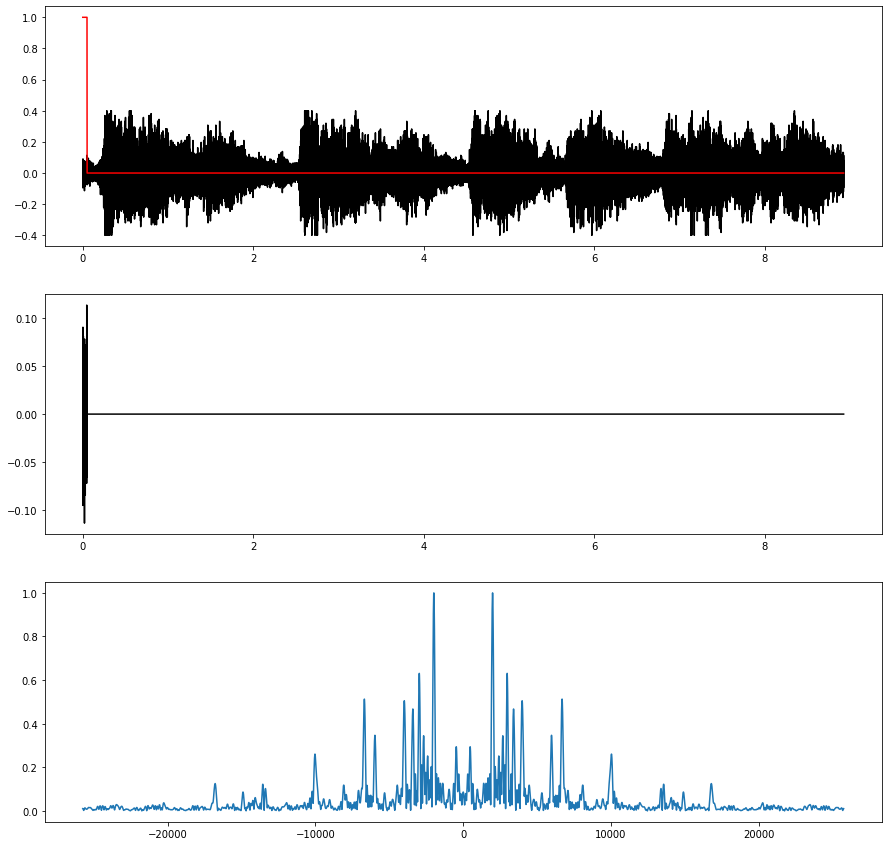

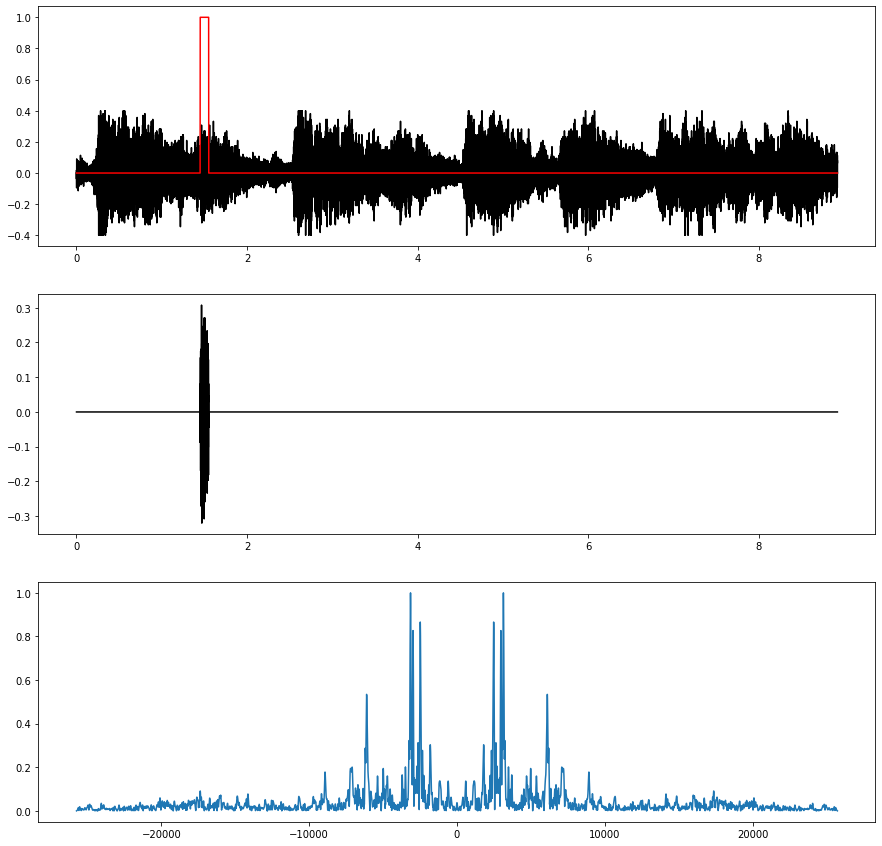

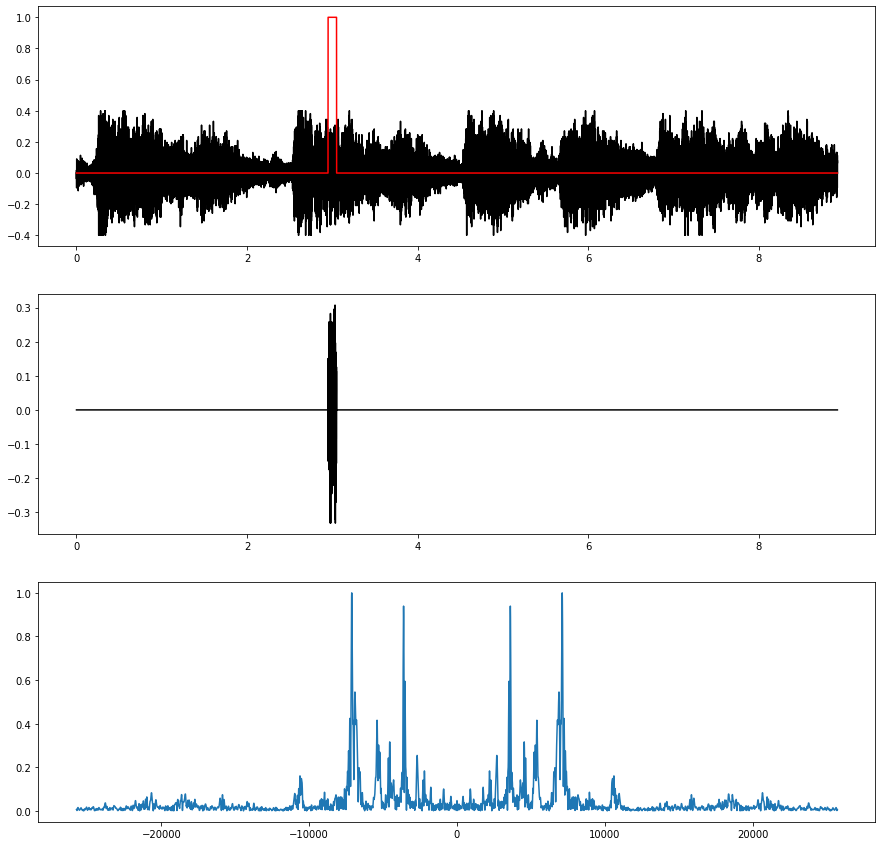

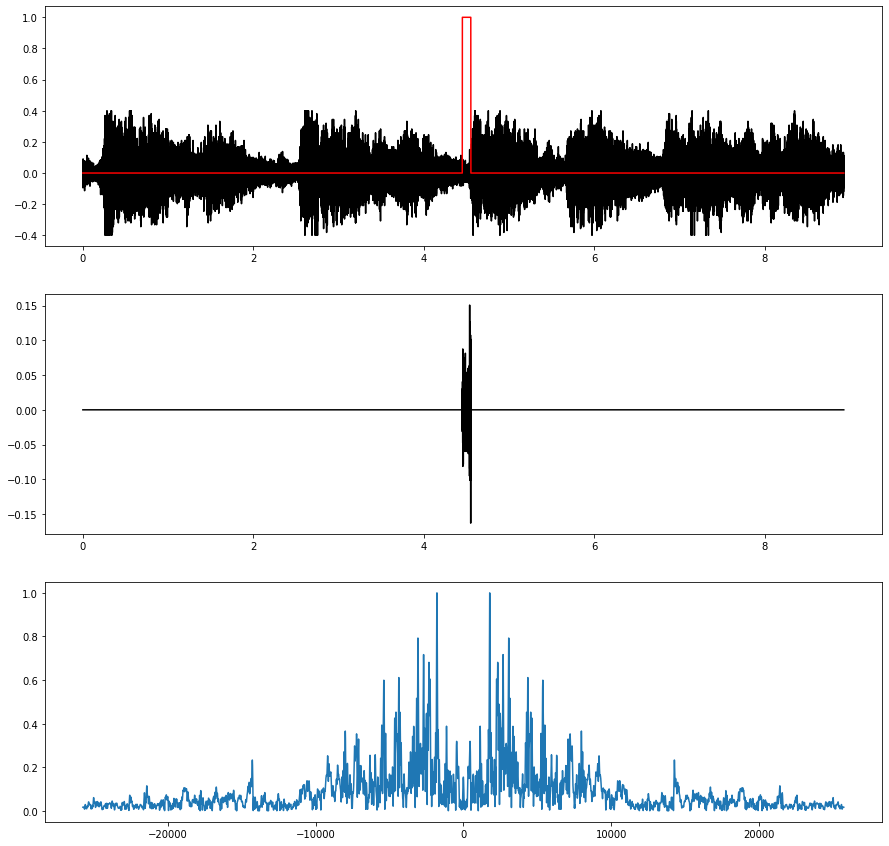

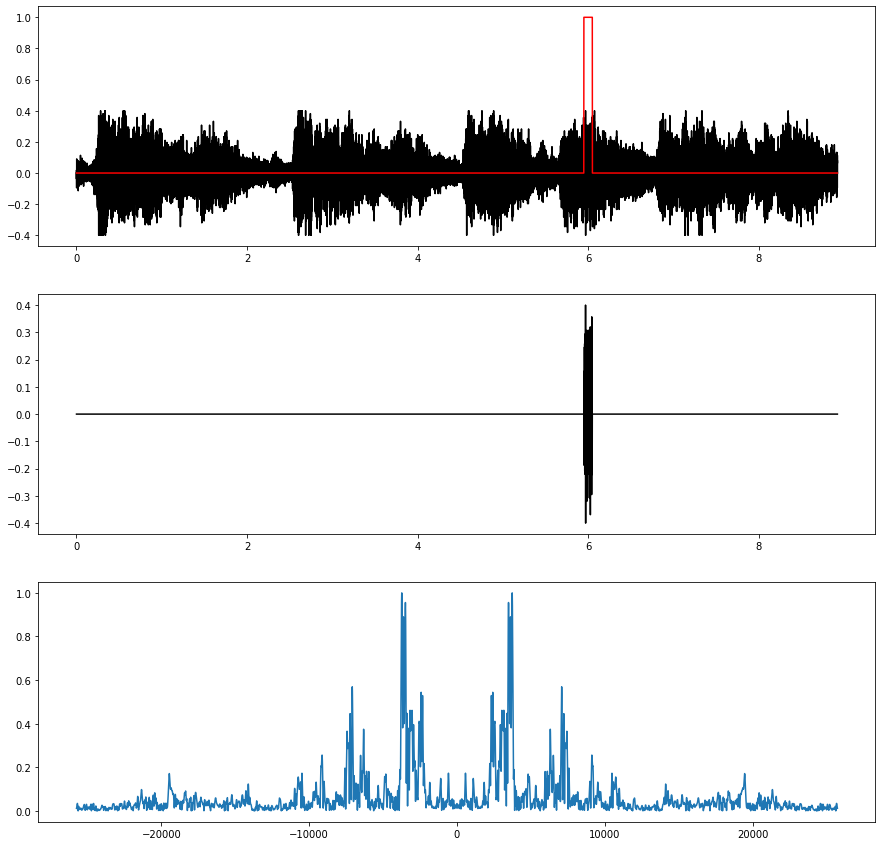

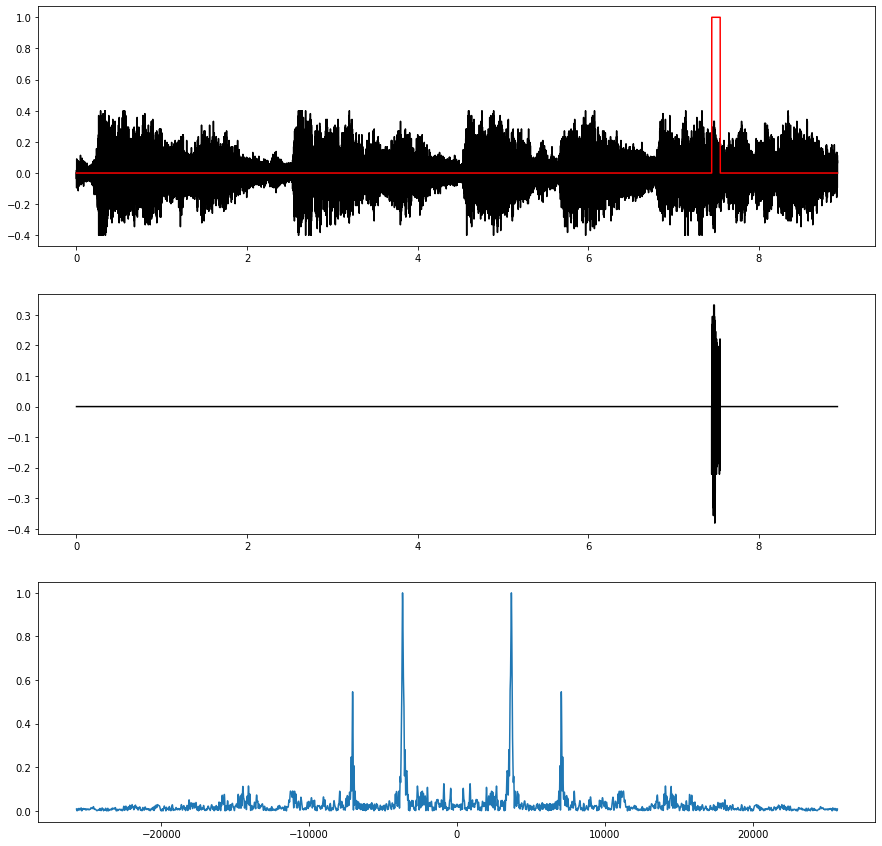

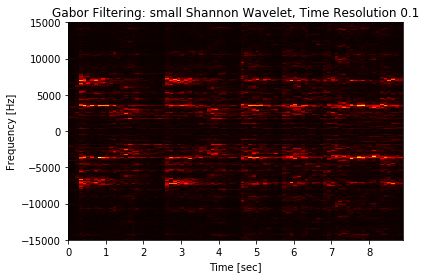

In [248]:
#Try smaller Shannon wavelet, time sampling 0.1

tres = 0.1
plot_count = 6
[Sgt_spec, tslide] = gaborFilter(v, Fs[0], tres, plot_count, ftype='shannonS')

xlim = (None, None)
ylim = (-15000, 15000)
title = 'Gabor Filtering: small Shannon Wavelet, Time Resolution 0.1'
spectroPlot(Sgt_spec, tslide, xlim, ylim, title)

In [ ]:
##PART TWO
